# <center> Property Price Prediction </center>

### Problem Statement

A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

### Data Defination/(Meaning of Variable)

Dwell_Type: Identifies the type of dwelling involved in the sale

Zone_Class: Identifies the general zoning classification of the sale

LotFrontage: Linear feet of street-connected to the property

LotArea: Lot size is the lot or parcel side where it adjoins a street, boulevard or access way

Road_Type: Type of road access to the property

Alley: Type of alley access to the property

Property_Shape: General shape of the property

LandContour: Flatness of the property

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

Dwelling_Type: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on the house

Exterior2nd: Exterior covering on the house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

ExterCond: Evaluates the present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of the basement area

TotalBsmtSF: Total square feet of the basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale

Property_Sale_Price: Price of the house

# Table Content / Algorithem

1.Import Libraries

2.Set Options

3.Read Data

4.Prepare and Analyze the Data

4.1 - Understand the Data
4.1.1 - Data Type
4.1.2 - Summary Statistics
4.1.3 - Distribution of Variables
4.1.4 - Discover Outliers
4.1.5 - Missing Values
4.1.6 - Correlation
4.1.7 - Analyze Relationships Between Target and Categorical Variables
4.2 - Data Preparation
4.2.1 - Check for Normality
4.2.2 - Dummy Encode the Categorical Variables

5.Linear Regression (OLS)

5.1 - Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)
5.2 - Multiple Linear Regression Full Model without Log Transformed Dependent Variable (OLS)
5.3 - Feature Engineering
5.3.1 - Multiple Linear Regression (Using New Feature) - 1
5.3.2 - Multiple Linear Regression (Using New Feature) - 2

6.Feature Selection

6.1 - Variance Inflation Factor

7.Conclusion and Interpretation

# Import Libraries

In [1]:
#for Data manipulation 

import numpy as np
import pandas as pd

#for Data type Conversion

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# for Statistical Analysis
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for emphasizes the variour Models like Regression, Classification , and clustering algorithem and Time series
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

#to perform scientific computation
from scipy.stats import shapiro
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = [15,8]

# Set Options to Print all the Data

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns  = None

np.set_printoptions(suppress = True)

# Read Data

In [4]:
df_property = pd.read_csv(r"D:\Imarticus\ML\Supervised learning\1-Regression  -Linear Regression OLS\HousePrices.csv")
df_property.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm          1Fam     2Story            7            5   
1      Feedr       Norm          1Fam     1Story            6            8   
2       Norm       Norm          1Fam     2Story            7            5   
3       Norm       Norm          1Fam     2Story            7            5   
4       Norm       Norm          1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ 

In [5]:
df_property.shape

(2073, 81)

# Data Analysis And Preparation

	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

In [6]:
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [7]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

As per the Problem Statement there we have Variable "DWell_type","OverallQual","OverallCond" as integer but this are the Categorical Data so we have to change The Data Type to String/Object    

### Lets convert The Data Types

In [8]:
df_property["Dwell_Type"] = df_property["Dwell_Type"].astype(str)
df_property["OverallCond"] = df_property["OverallCond"].astype(object)
df_property["OverallQual"] = df_property["OverallQual"].astype(object)

In [9]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   object 
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

### Summary Statistics

In [10]:
# For Continious Data
df_property.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  2073.000000  1753.000000    2073.000000  2073.000000   2073.000000   
mean    916.132176    72.056475   10717.853353  1969.445731   1986.617463   
std     493.014670    27.987475    9215.982306    30.222647     20.432694   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     519.000000    60.000000    7620.000000  1950.000000   1970.000000   
50%     932.000000    70.000000    9492.000000  1971.000000   1995.000000   
75%    1302.000000    83.000000   11601.000000  1999.000000   2004.000000   
max    1820.000000   313.000000  215245.000000  2010.000000   2023.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  2059.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean    101.875668   437.949349    49.219489   565.101302  1052.270140   
std     179.169217   448.051119   165.621465   449.730940   431.026436   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   208.000000   794.000000   
50%       0.000000   381.000000     0.000000   466.000000   990.000000   
75%     161.500000   708.000000     0.000000   804.000000  1291.000000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  2073.000000  2073.000000   2073.000000  2073.000000   2073.000000   
mean   1166.096961   344.745779      6.168355  1517.011095      0.429329   
std     376.975119   438.844748     49.553967   517.236428      0.522605   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     894.000000     0.000000      0.000000  1126.000000      0.000000   
50%    1095.000000     0.000000      0.000000  1470.000000      0.000000   
75%    1391.000000   730.000000      0.000000  1792.000000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   2073.000000  2073.000000  2073.000000   2073.000000   2073.000000   
mean       0.056440     1.571635     0.378678      2.874096      1.052581   
std        0.237015     0.545963     0.499873      0.816144      0.237901   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   2073.000000  2073.000000  1960.000000  2073.000000  2073.000000   
mean       6.540280     0.602026  1980.418367     1.775687   474.683068   
std        1.629673     0.633931    24.158327     0.741976   212.284955   
min        2.000000     0.000000  1906.000000     0.000000     0.000000   
25%        5.000000     0.000000  1963.000000     1.000000   336.000000   
50%        6.000000     1.000000  1984.000000     2.000000   480.000000   
75%        7.000000     1.000000  2003.000000     2.000000   576.000000   
max       14.000000     3.000000  2019.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2073.000000  2073.000000    2073.000000  2073.000000  2073.000000   
mean     94.168837    46.035697      21.029908     2.979257    14.552340   
std     129.072113    64.768713      59.569928    26.817218    54.099626   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     168.000000    67.000000       0.000000     0.000000     0.00

In [11]:
# for Categorical Data
df_property.describe(include = object)

Dwell_Type Zone_Class Road_Type Alley Property_Shape LandContour  \
count        2073       2073      2073   129           2073        2073   
unique         18          5         2     2              4           4   
top            20         RL      Pave  Grvl            Reg         Lvl   
freq          722       1611      2063    72           1300        1854   

       Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
count       2073      2073      2073         2073       2073       2073   
unique         2         5         3           25          9          8   
top       AllPub    Inside       Gtl        NAmes       Norm       Norm   
freq        2070      1481      1958          317       1794       2054   

       Dwelling_Type HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
count           2073       2073         2073         2073      2073     2073   
unique             5          8           10            9         6        8   
top             1Fam     1Story            5            5     Gable  CompShg   
freq            1719       1036          508          943      1606     2036   

       Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
count         2073        2073       2059      2073      2073       2073   
unique          15          16          4         4         5          6   
top        VinylSd     VinylSd       None        TA        TA      PConc   
freq           750         729       1233      1272      1815        928   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      2014     2014         2012         2014         2013    2073   
unique        4        4            4            6            6       6   
top          Gd       TA           No          Unf          Unf    GasA   
freq        904     1851         1349          604         1770    2025   

       HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
count       2073       2073       2072        2073       2073        1085   
unique         5          2          5           4          7           5   
top           Ex          Y      SBrkr          TA        Typ          Gd   
freq        1045       1935       1901        1043       1937         530   

       GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count        1960         1960       1960       1960       2073      8    404   
unique          6            3          5          5          3      3      4   
top        Attchd          Unf         TA         TA          Y     Gd  MnPrv   
freq         1252          857       1870       1885       1913      4    233   

       MiscFeature SaleType SaleCondition  
count           80     2073          2073  
unique           4        9             6  
top           Shed       WD        Normal  
freq            74     1797          1695

AS PER THE DATASET  THERE WE HAVE  VERY LESS COUNT IN "PoolQC" AND "PoolArea" i.e 98% missing Values in Variable so better to drop this variable and Droping "ID" as its not required for Analysis

In [12]:
df_property = df_property.drop(["PoolQC","PoolArea","Id"], axis = 1)

In [13]:
df_property.shape

(2073, 78)

### Distribution of Variable
#### To check the distribution we will plot  the Histogram

**For Numeric**

In [14]:
df_numeric_features = df_property.select_dtypes(include = np.number)

df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [15]:
df_numeric_features.shape

(2073, 33)

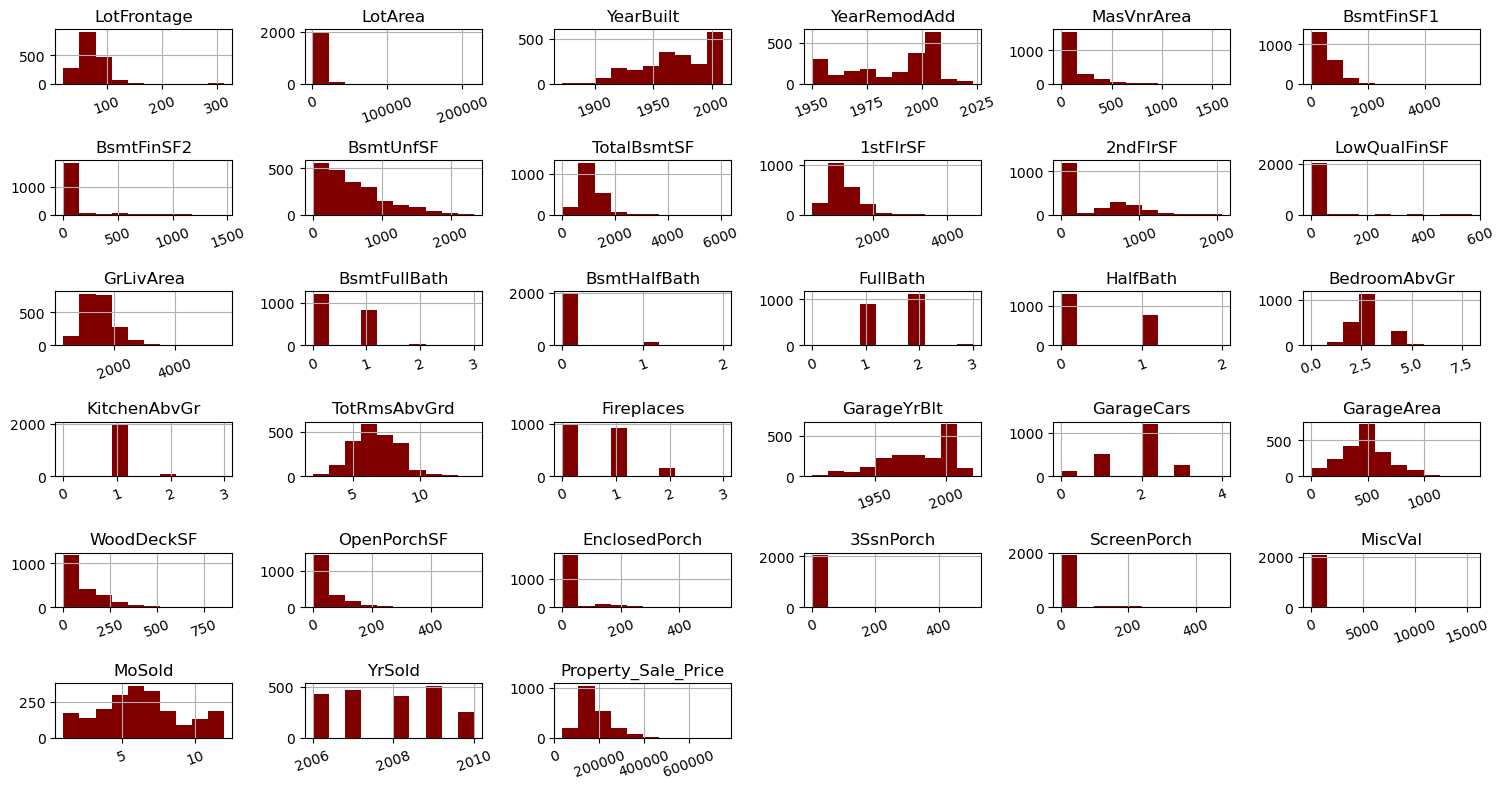

In [16]:
df_property.hist(xrot = 20 , color = "maroon")
plt.tight_layout()
plt.show()

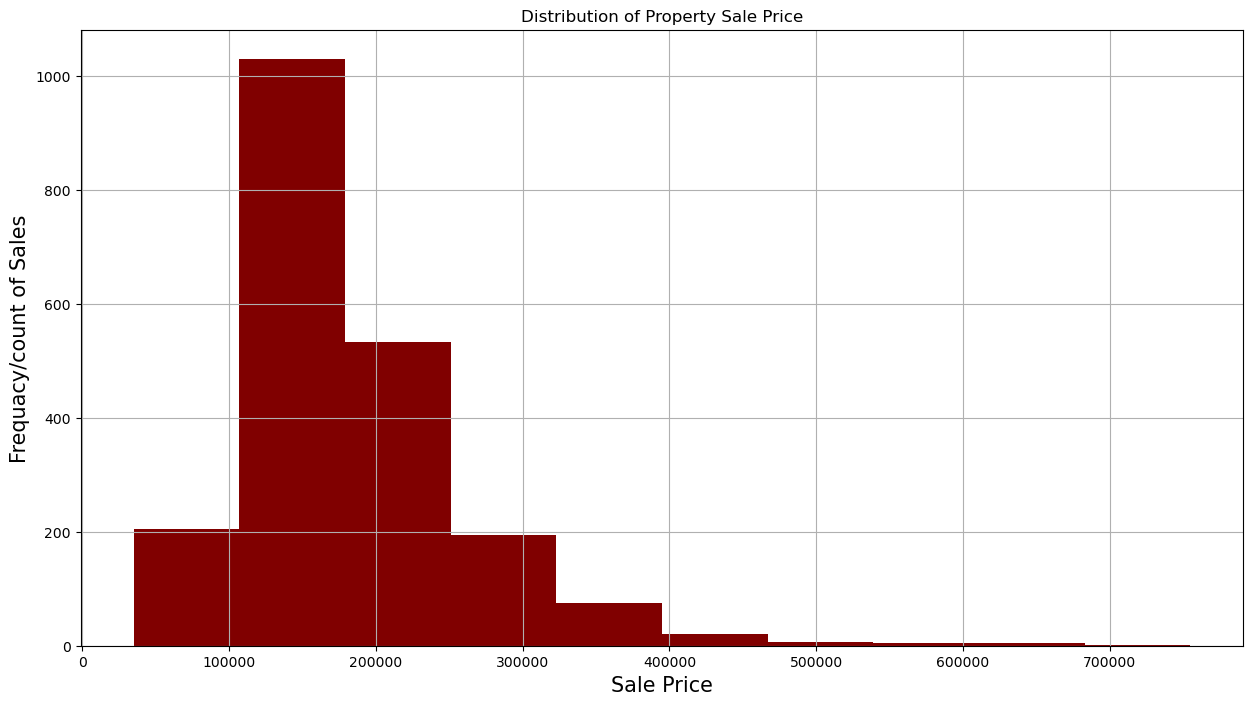

In [17]:
df_property["Property_Sale_Price"].hist( color = "maroon")
plt.xlabel("Sale Price", fontsize = 15)
plt.ylabel("Frequacy/count of Sales", fontsize = 15)
plt.title("Distribution of Property Sale Price")
plt.show()

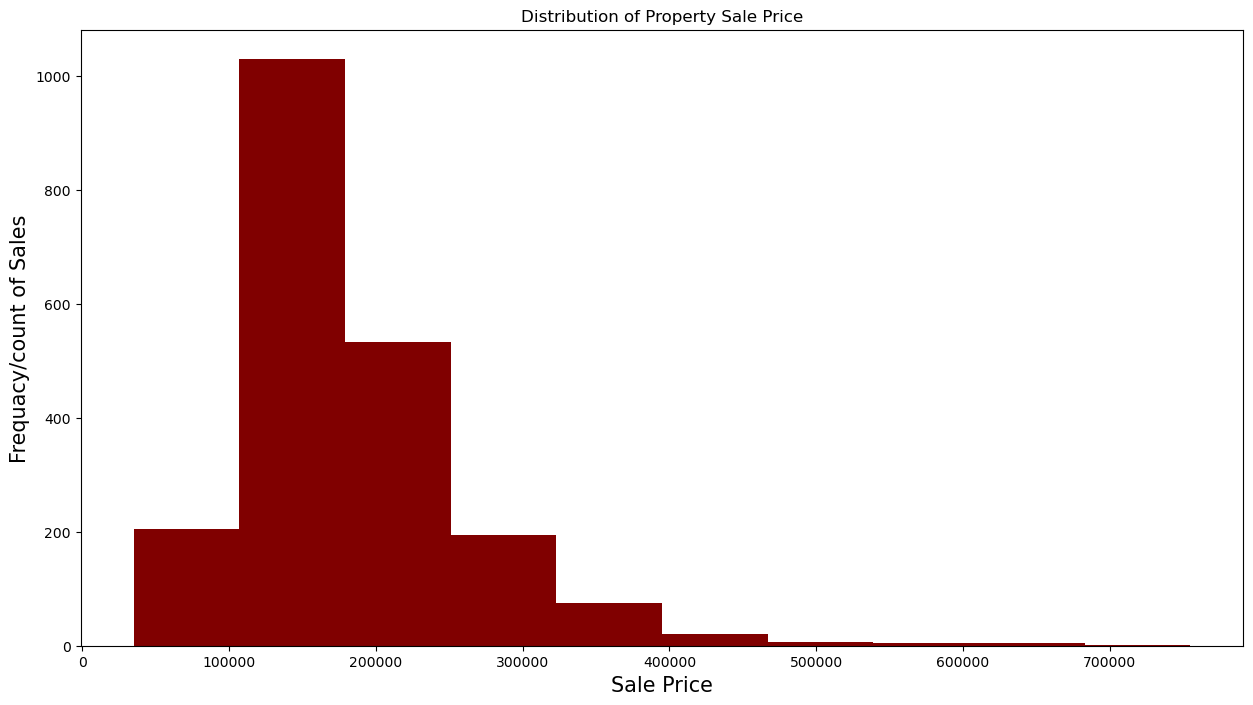

In [18]:
#Without Graph
plt.hist(df_property["Property_Sale_Price"],color = "maroon")
plt.xlabel("Sale Price", fontsize = 15)
plt.ylabel("Frequacy/count of Sales", fontsize = 15)
plt.title("Distribution of Property Sale Price")
plt.show()

**For Categorical**

In [19]:
df_Categorical = df_property.select_dtypes(include = object)

In [20]:
df_Categorical.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

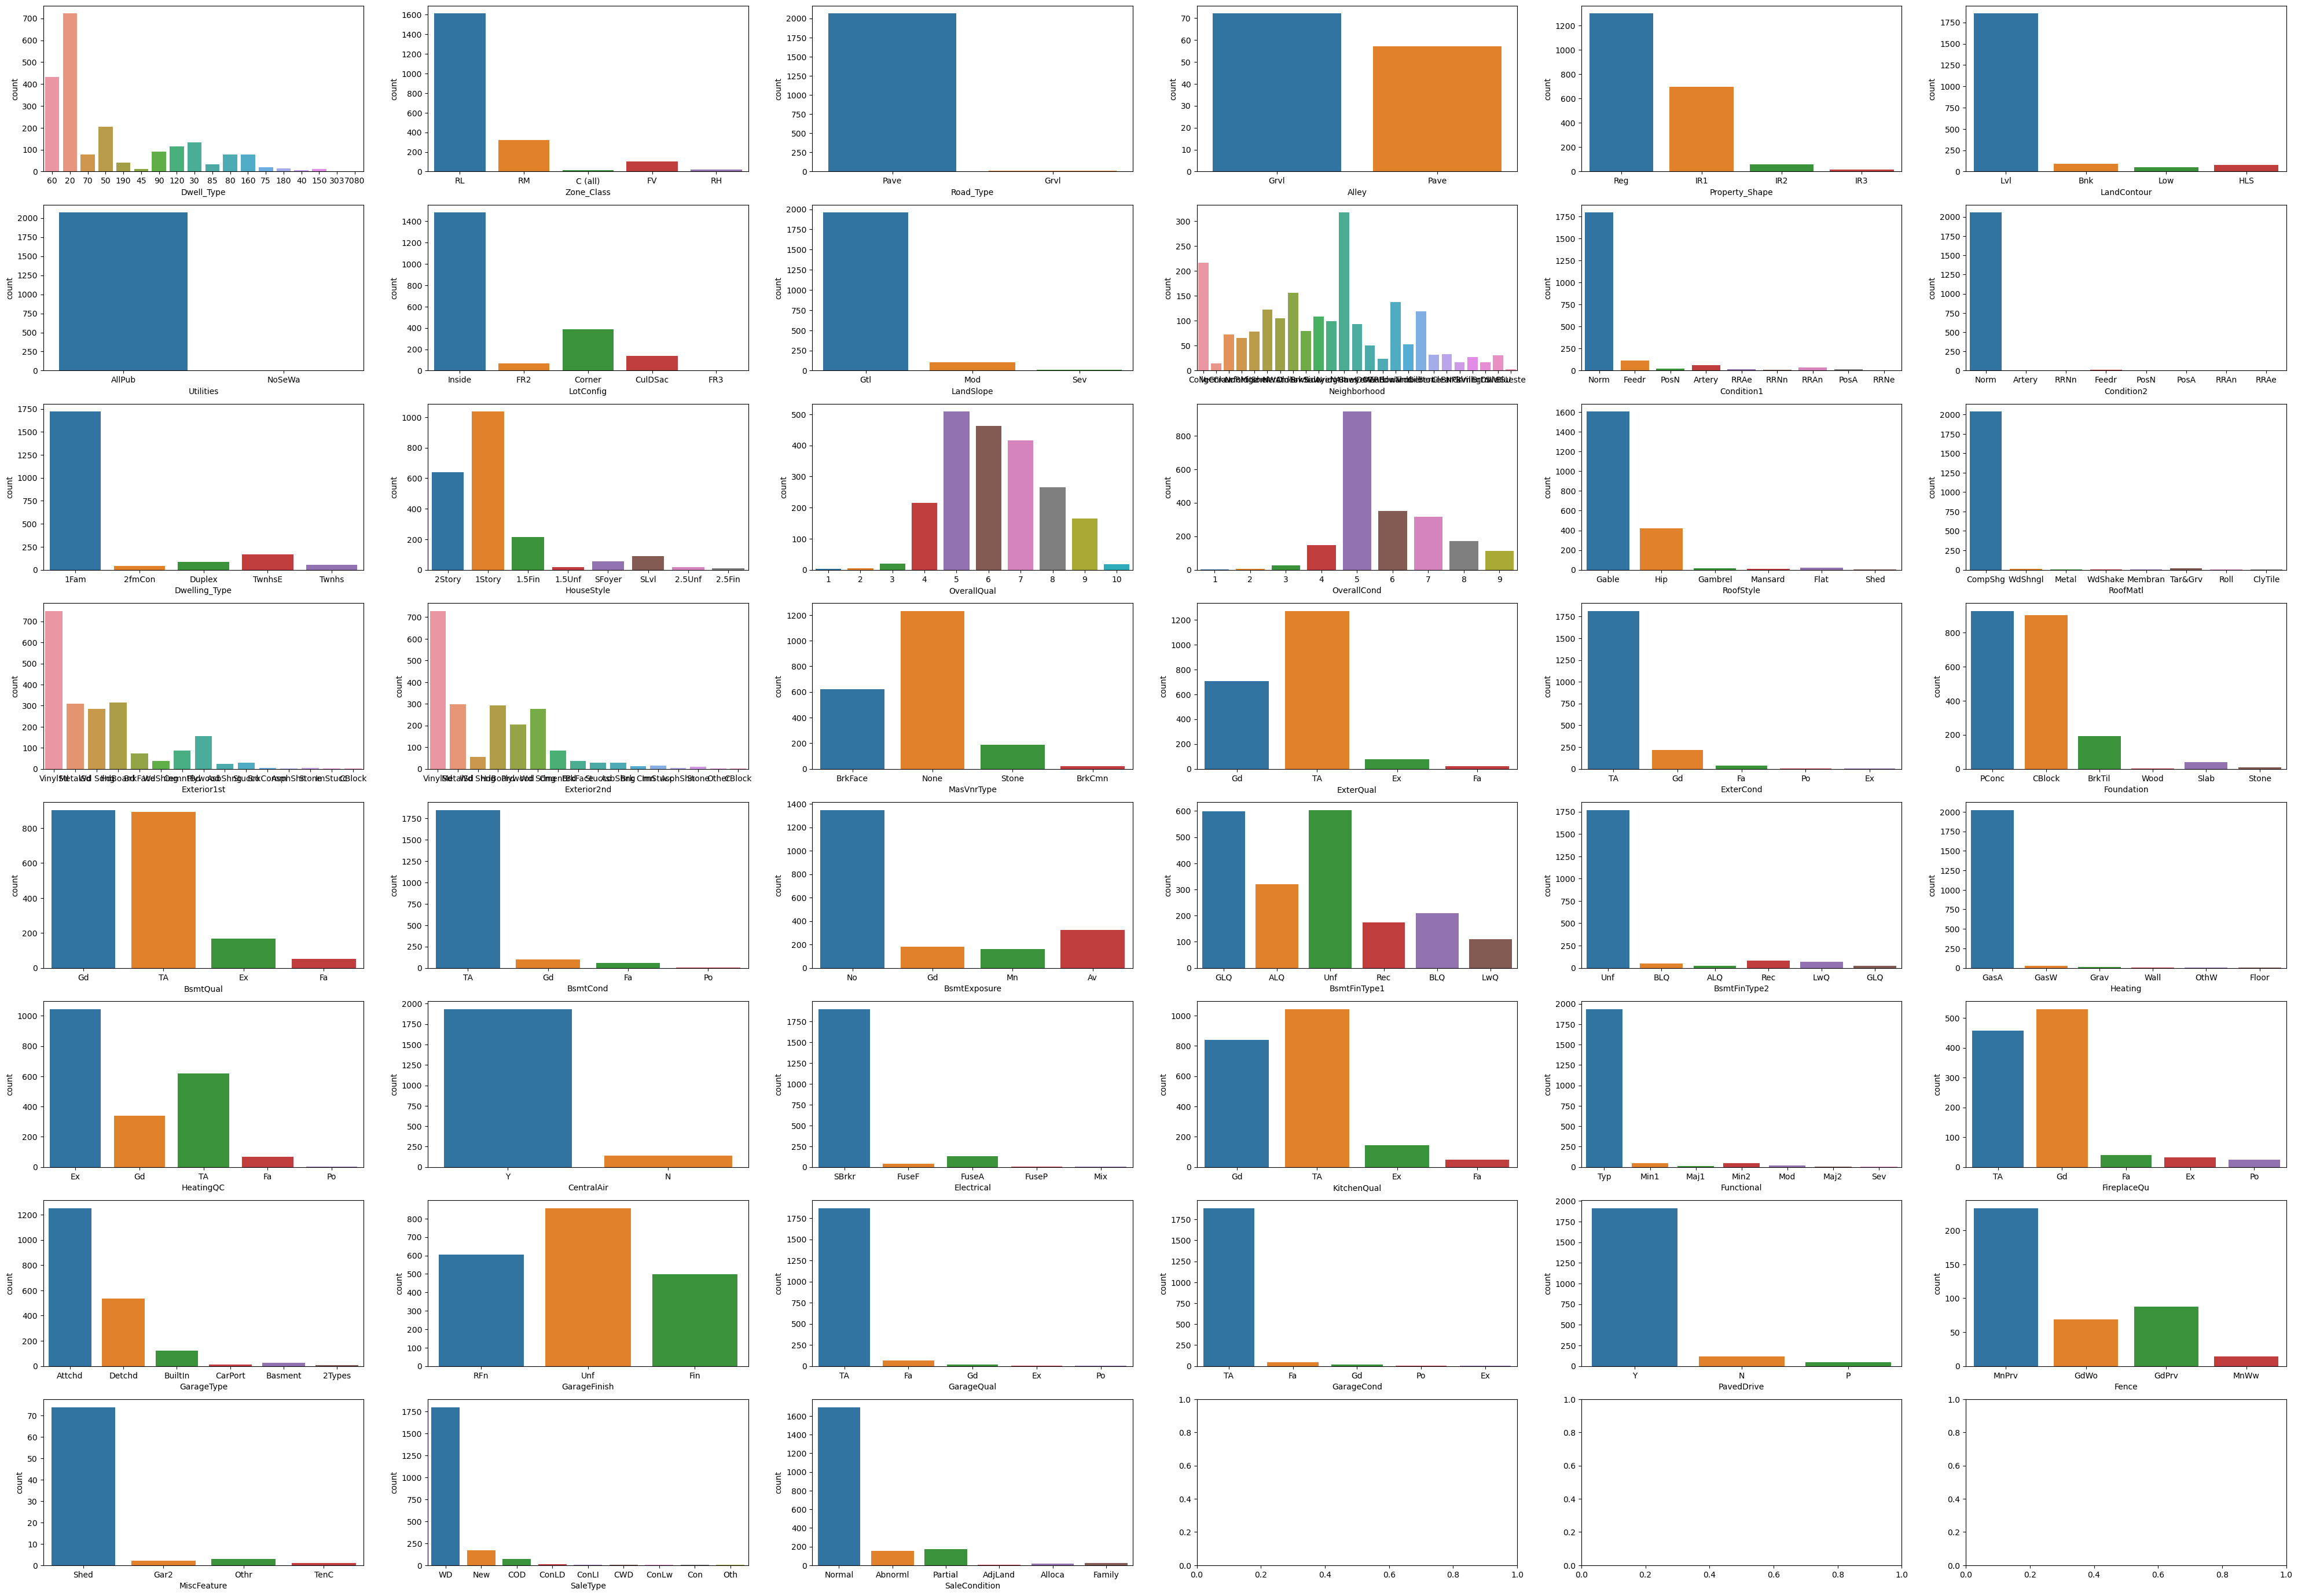

In [21]:
categorical = []

for column in df_property:
    if is_string_dtype(df_property[column]):
        categorical.append(column)
        
fix, ax = plt.subplots(nrows = 8, ncols = 6, figsize = (50,35))

for variable, subplot in zip(categorical , ax.flatten()):
    sns.countplot(df_property[variable] , ax = subplot)
    
plt.show()

### Boxplot of OverallQuality and Property_Sales_Price 

In [22]:
df_property["OverallQual"].nunique()

10

In [23]:
df_property["OverallQual"].unique()

array([7, 6, 8, 5, 9, 4, 10, 3, 1, 2], dtype=object)

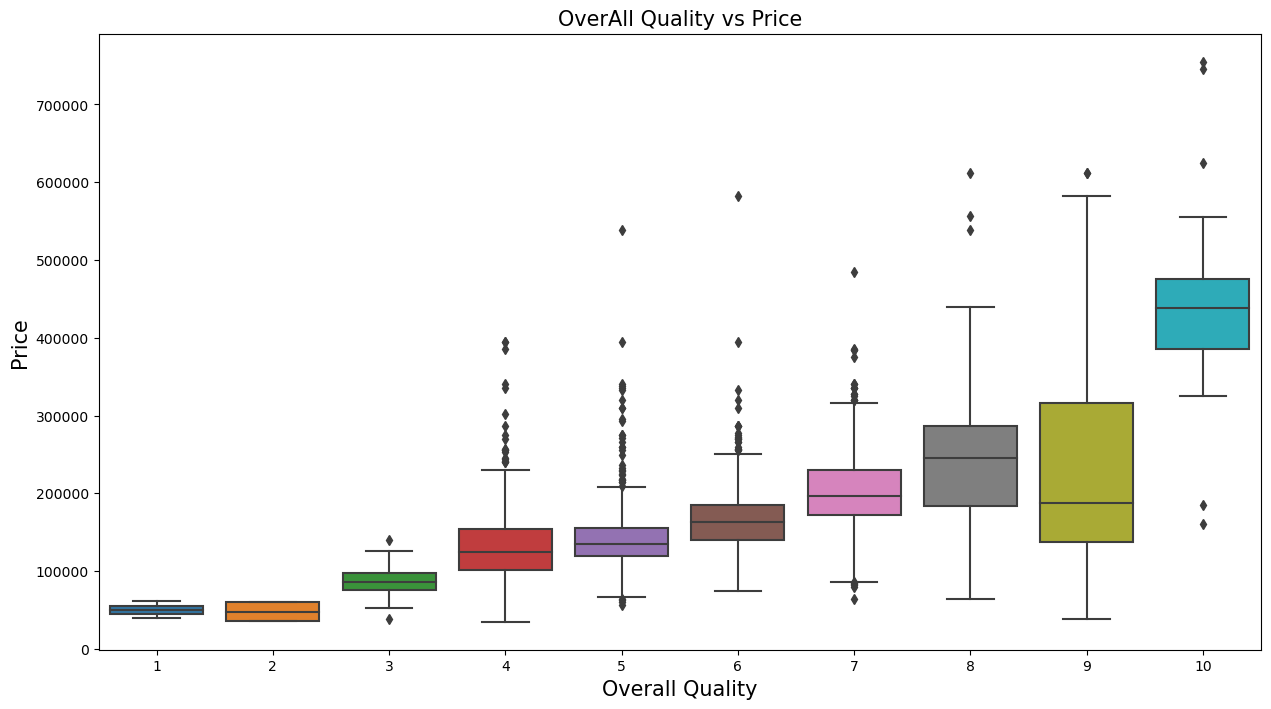

In [24]:
sns.boxplot(x = "OverallQual",y = "Property_Sale_Price", data = df_property)
plt.title("OverAll Quality vs Price",fontsize = 15)
plt.xlabel("Overall Quality",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.show()

In [25]:
df_property["OverallCond"].nunique()

9

In [26]:
df_property["OverallCond"].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=object)

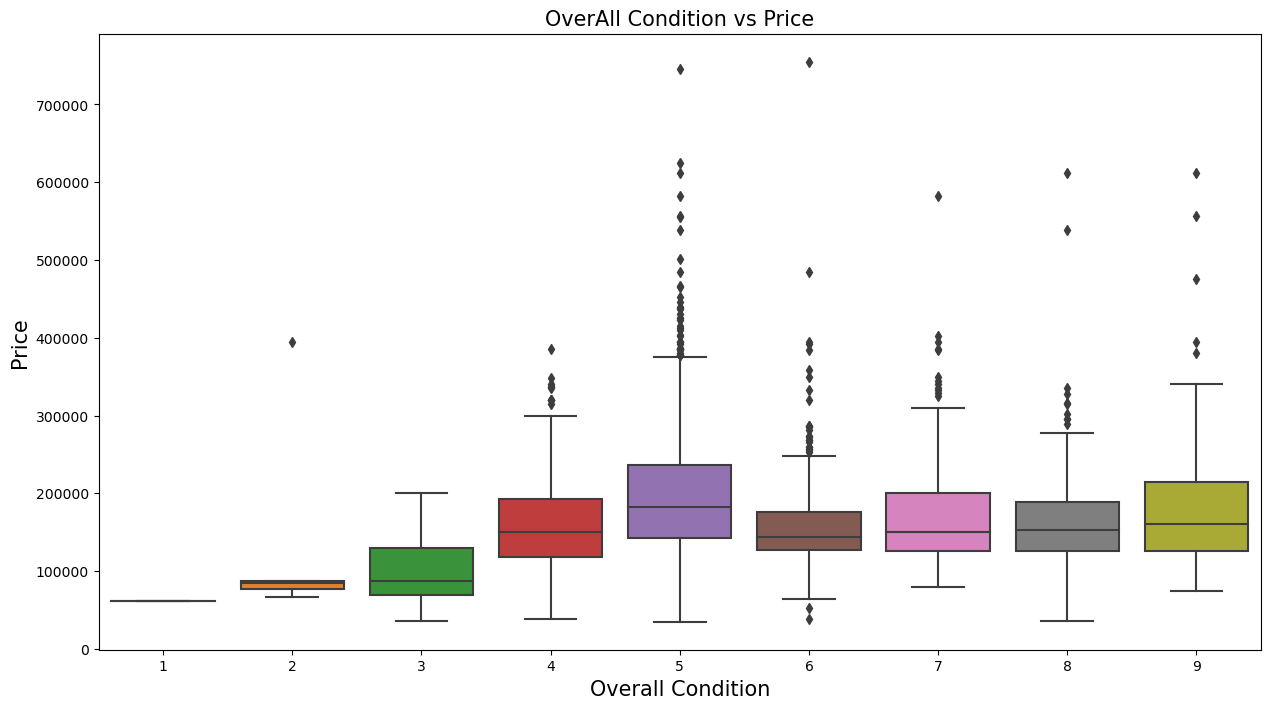

In [27]:
sns.boxplot(x = "OverallCond",y = "Property_Sale_Price", data = df_property)
plt.title("OverAll Condition vs Price",fontsize = 15)
plt.xlabel("Overall Condition",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.show()

### Drawing the Pairplot to check the distibution with respect to Price

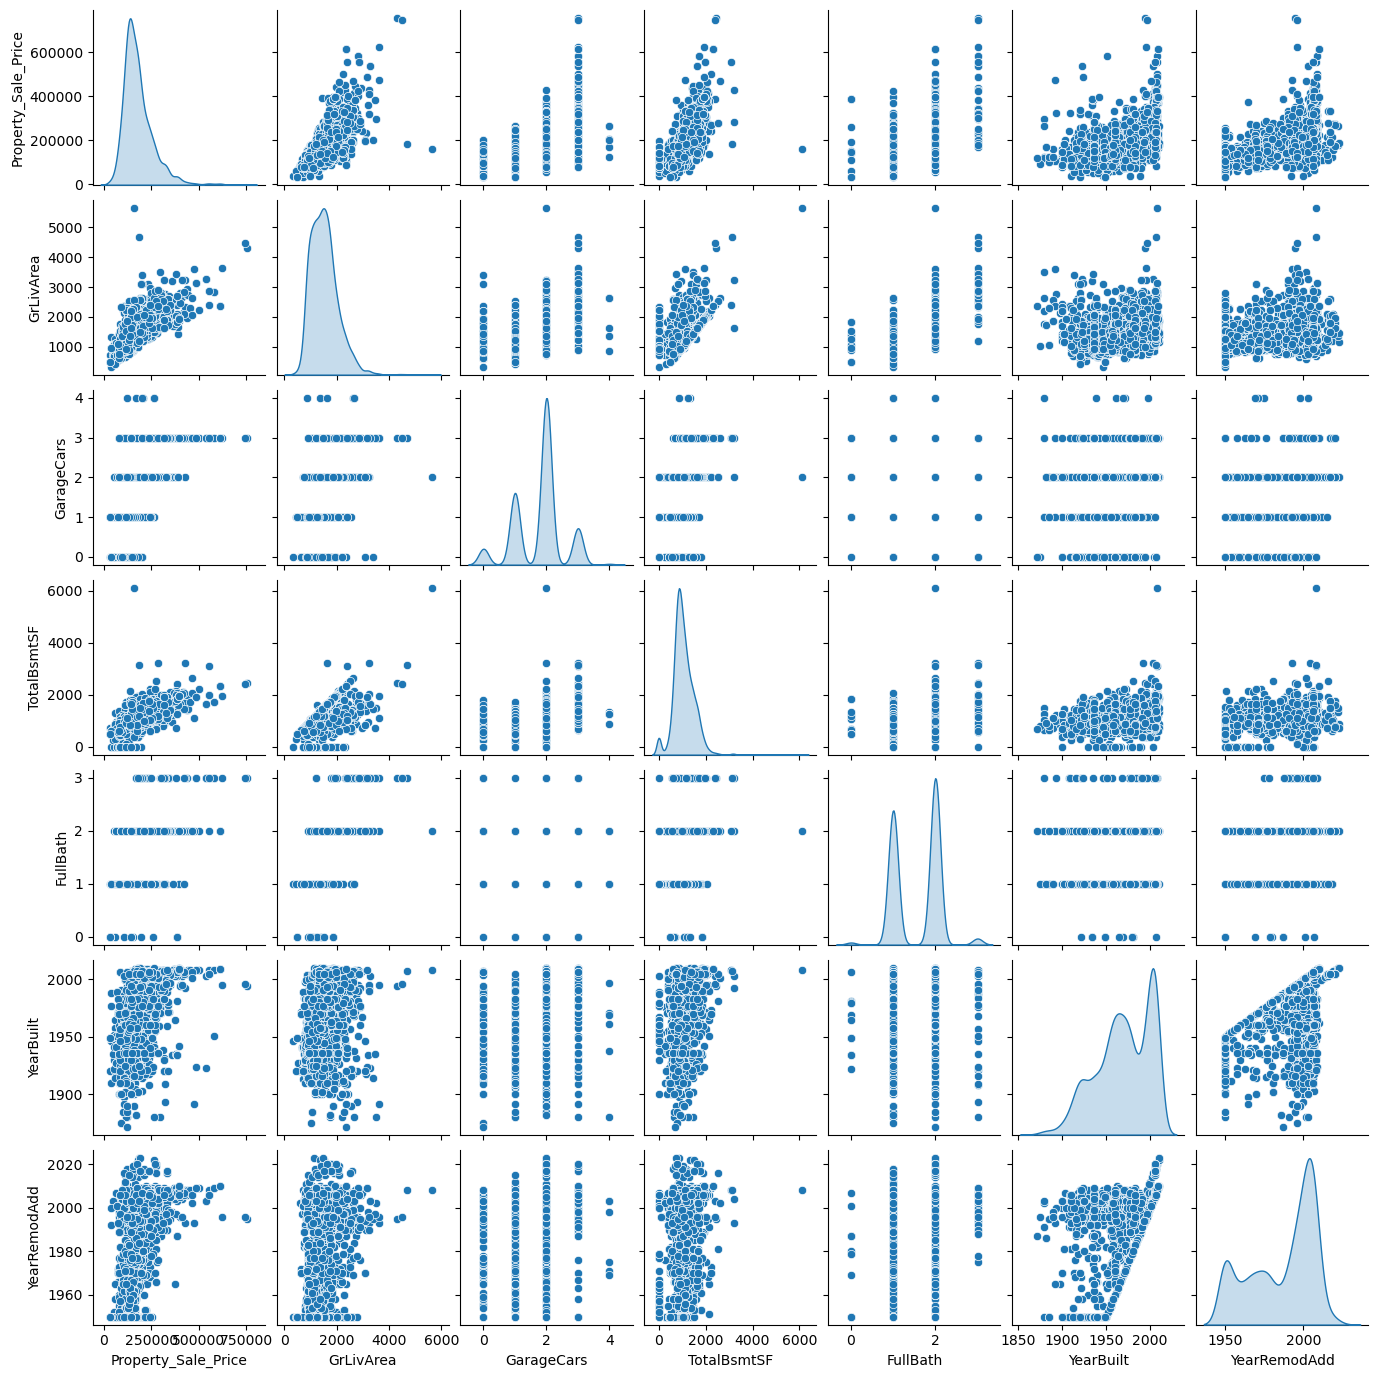

In [28]:
columns = [ "Property_Sale_Price","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd"]

sns.pairplot(df_property[columns],size = 2,kind = "scatter",diag_kind = "kde")

plt.show()

### Outliers Discovery

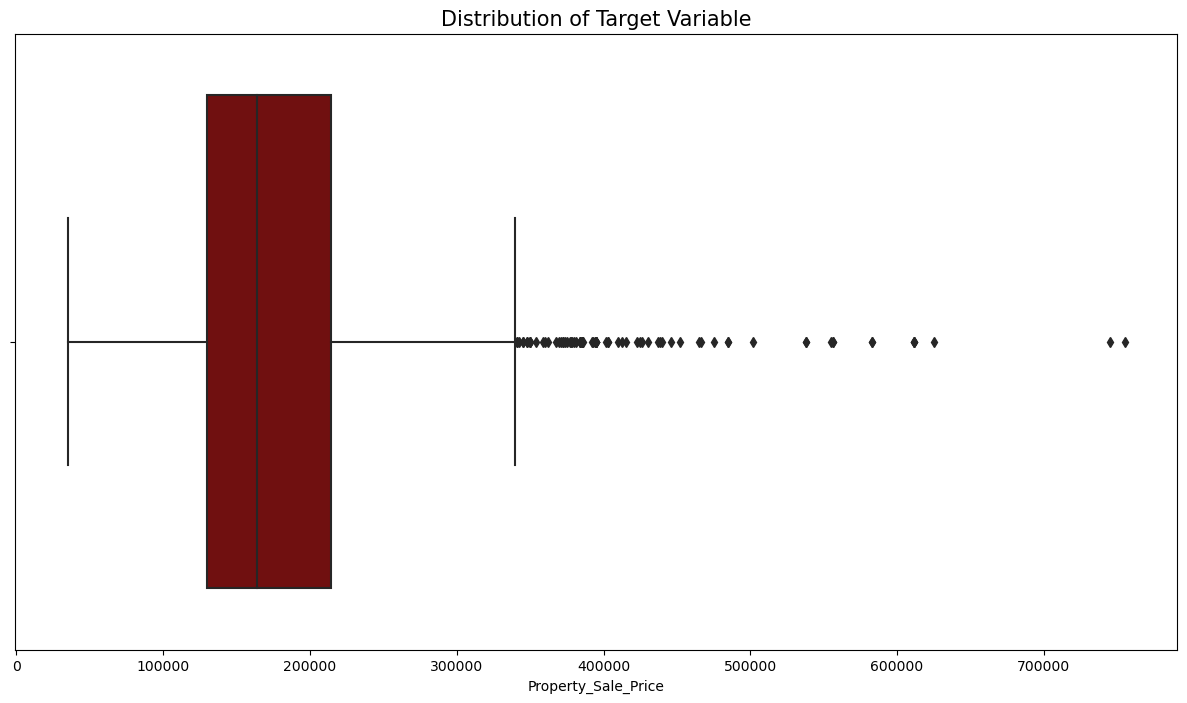

In [29]:
sns.boxplot(df_property["Property_Sale_Price"], color= "maroon")
plt.title("Distribution of Target Variable",fontsize = 15)
plt.show()

In [30]:
df_property = df_property[df_property["Property_Sale_Price"] < 500000]

In [31]:
df_property.shape

(2059, 78)

### Handeling Missing Values
If we do not handle the missing values properly then we may end up drawing an inaccurate inference about the data.

**Looking for Missing values**

In [32]:
df_property.isnull().sum().sort_values(ascending = False)

MiscFeature            1979
Alley                  1930
Fence                  1656
FireplaceQu             988
LotFrontage             320
GarageType              113
GarageFinish            113
GarageQual              113
GarageCond              113
GarageYrBlt             113
BsmtExposure             61
BsmtFinType2             60
BsmtCond                 59
BsmtFinType1             59
BsmtQual                 59
MasVnrArea               14
MasVnrType               14
Electrical                1
HalfBath                  0
BsmtFullBath              0
BsmtHalfBath              0
BedroomAbvGr              0
FullBath                  0
TotRmsAbvGrd              0
Functional                0
KitchenAbvGr              0
KitchenQual               0
Dwell_Type                0
Fireplaces                0
LowQualFinSF              0
GarageCars                0
GarageArea                0
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch       

In [33]:
df_property.isnull().count()

Dwell_Type             2059
Zone_Class             2059
LotFrontage            2059
LotArea                2059
Road_Type              2059
Alley                  2059
Property_Shape         2059
LandContour            2059
Utilities              2059
LotConfig              2059
LandSlope              2059
Neighborhood           2059
Condition1             2059
Condition2             2059
Dwelling_Type          2059
HouseStyle             2059
OverallQual            2059
OverallCond            2059
YearBuilt              2059
YearRemodAdd           2059
RoofStyle              2059
RoofMatl               2059
Exterior1st            2059
Exterior2nd            2059
MasVnrType             2059
MasVnrArea             2059
ExterQual              2059
ExterCond              2059
Foundation             2059
BsmtQual               2059
BsmtCond               2059
BsmtExposure           2059
BsmtFinType1           2059
BsmtFinSF1             2059
BsmtFinType2           2059
BsmtFinSF2          

In [34]:
total_nulls = df_property.isnull().sum().sort_values(ascending = False)

percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())

precent_null = percent_null.sort_values(ascending = False)

missing_values  = pd.concat([total_nulls,percent_null],axis = 1, keys = 
                            ["Total Nulls","Percentage of Missing values"])

missing_values["Data Type"] = df_property[missing_values.index].dtypes
missing_values

Total Nulls  Percentage of Missing values Data Type
MiscFeature                 1979                     96.114619    object
Alley                       1930                     93.734823    object
Fence                       1656                     80.427392    object
FireplaceQu                  988                     47.984458    object
LotFrontage                  320                     15.541525   float64
GarageType                   113                      5.488101    object
GarageFinish                 113                      5.488101    object
GarageQual                   113                      5.488101    object
GarageCond                   113                      5.488101    object
GarageYrBlt                  113                      5.488101   float64
BsmtExposure                  61                      2.962603    object
BsmtFinType2                  60                      2.914036    object
BsmtCond                      59                      2.865469    object
BsmtFinType1                  59                      2.865469    object
BsmtQual                      59                      2.865469    object
MasVnrArea                    14                      0.679942   float64
MasVnrType                    14                      0.679942    object
Electrical                     1                      0.048567    object
HalfBath                       0                      0.000000     int64
BsmtFullBath                   0                      0.000000     int64
BsmtHalfBath                   0                      0.000000     int64
BedroomAbvGr                   0                      0.000000     int64
FullBath                       0                      0.000000     int64
TotRmsAbvGrd                   0                      0.000000     int64
Functional                     0                      0.000000    object
KitchenAbvGr                   0                      0.000000     int64
KitchenQual                    0                      0.000000    object
Dwell_Type                     0                      0.000000    object
Fireplaces                     0                      0.000000     int64
LowQualFinSF                   0                      0.000000     int64
GarageCars                     0                      0.000000     int64
GarageArea                     0                      0.000000     int64
PavedDrive                     0                      0.000000    object
WoodDeckSF                     0                      0.000000     int64
OpenPorchSF                    0                      0.000000     int64
EnclosedPorch                  0                      0.000000     int64
3SsnPorch                      0                      0.000000     int64
ScreenPorch                    0                      0.000000     int64
MiscVal                        0                      0.000000     int64
MoSold                         0                      0.000000     int64
YrSold                         0                      0.000000     int64
SaleType                       0                      0.000000    object
SaleCondition                  0                      0.000000    object
GrLivArea                      0                      0.000000     int64
HeatingQC                      0                      0.000000    object
2ndFlrSF                       0                      0.000000     int64
YearBuilt                      0                      0.000000     int64
LotArea                        0                      0.000000     int64
Road_Type                      0                      0.000000    object
Property_Shape                 0                      0.000000    object
LandContour                    0                      0.000000    object
Utilities                      0                      0.000000    object
LotConfig                      0                      0.000000    object
LandSlope                      0                      0.000000    object
Neighb

**Handle Missing Values**






In [35]:
num_missing_values = missing_values[(missing_values["Total Nulls"] > 0)&(missing_values["Data Type"] != object)]

num_missing_values

Total Nulls  Percentage of Missing values Data Type
LotFrontage          320                     15.541525   float64
GarageYrBlt          113                      5.488101   float64
MasVnrArea            14                      0.679942   float64

For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

**The variable 'LotFrontage' is right skewed and thus we will fill the missing values with its median value**

In [36]:
df_property["LotFrontage"] = df_property["LotFrontage"].fillna(df_property["LotFrontage"].median())

**We will replace the missing values in the numeric variable GarageYrBlt by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available.**

In [37]:
df_property["GarageYrBlt"] = df_property["GarageYrBlt"].fillna(0)

**The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with its median value**

In [38]:
df_property["MasVnrArea"] = df_property["MasVnrArea"].fillna(df_property["MasVnrArea"].median())

### Handeling Missing Values for Categorical Variable

In [39]:
cat_missing_values =  missing_values[(missing_values["Total Nulls"] >0) & (missing_values["Data Type"] == object)]

In [40]:
cat_missing_values

Total Nulls  Percentage of Missing values Data Type
MiscFeature          1979                     96.114619    object
Alley                1930                     93.734823    object
Fence                1656                     80.427392    object
FireplaceQu           988                     47.984458    object
GarageType            113                      5.488101    object
GarageFinish          113                      5.488101    object
GarageQual            113                      5.488101    object
GarageCond            113                      5.488101    object
BsmtExposure           61                      2.962603    object
BsmtFinType2           60                      2.914036    object
BsmtCond               59                      2.865469    object
BsmtFinType1           59                      2.865469    object
BsmtQual               59                      2.865469    object
MasVnrType             14                      0.679942    object
Electrical              1                      0.048567    object

In [41]:
df_property["MiscFeature"] = df_property["MiscFeature"].fillna("None")

df_property["Alley"] = df_property["Alley"].fillna("No alley Access")

df_property["Fence"] = df_property["Fence"].fillna("No Fence")

df_property["FireplaceQu"] = df_property["FireplaceQu"].fillna("No Fireplace")


In [42]:
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df_property[col].fillna("No Garage",inplace = True)

In [43]:
for i in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_property[i].fillna("No Basement",inplace = True)

In [44]:
df_property["MasVnrType"]= df_property["MasVnrType"].fillna("None")

In [45]:
mode_eletrical = df_property["Electrical"].mode()

In [46]:
mode_eletrical

0    SBrkr
Name: Electrical, dtype: object

In [47]:
df_property["Electrical"].fillna(mode_eletrical[0], inplace = True)

In [48]:
df_property.isnull().sum()*100/df_property.isnull().count()

Dwell_Type             0.0
Zone_Class             0.0
LotFrontage            0.0
LotArea                0.0
Road_Type              0.0
Alley                  0.0
Property_Shape         0.0
LandContour            0.0
Utilities              0.0
LotConfig              0.0
LandSlope              0.0
Neighborhood           0.0
Condition1             0.0
Condition2             0.0
Dwelling_Type          0.0
HouseStyle             0.0
OverallQual            0.0
OverallCond            0.0
YearBuilt              0.0
YearRemodAdd           0.0
RoofStyle              0.0
RoofMatl               0.0
Exterior1st            0.0
Exterior2nd            0.0
MasVnrType             0.0
MasVnrArea             0.0
ExterQual              0.0
ExterCond              0.0
Foundation             0.0
BsmtQual               0.0
BsmtCond               0.0
BsmtExposure           0.0
BsmtFinType1           0.0
BsmtFinSF1             0.0
BsmtFinType2           0.0
BsmtFinSF2             0.0
BsmtUnfSF              0.0
T

### Study Correlation

In [49]:
numeric_df = df_property.select_dtypes(include = "number")

In [50]:
corrmat = numeric_df.corr()
print(corrmat)

                     LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
LotFrontage             1.000000  0.238191   0.081517      0.092211   
LotArea                 0.238191  1.000000  -0.017109      0.013312   
YearBuilt               0.081517 -0.017109   1.000000      0.534846   
YearRemodAdd            0.092211  0.013312   0.534846      1.000000   
MasVnrArea              0.111412  0.041665   0.258605      0.153766   
BsmtFinSF1              0.118122  0.157255   0.200397      0.092169   
BsmtFinSF2              0.055937  0.077684  -0.027750     -0.074160   
BsmtUnfSF               0.105129 -0.000161   0.117984      0.197311   
TotalBsmtSF             0.256237  0.193753   0.322489      0.275945   
1stFlrSF                0.318458  0.239459   0.225896      0.214706   
2ndFlrSF                0.054620  0.023070   0.011759      0.133300   
LowQualFinSF            0.024525 -0.000437  -0.180594     -0.084622   
GrLivArea               0.284689  0.196624   0.158950      0.265337   
BsmtFu

**Ploting Heatmap to correlation visulization**

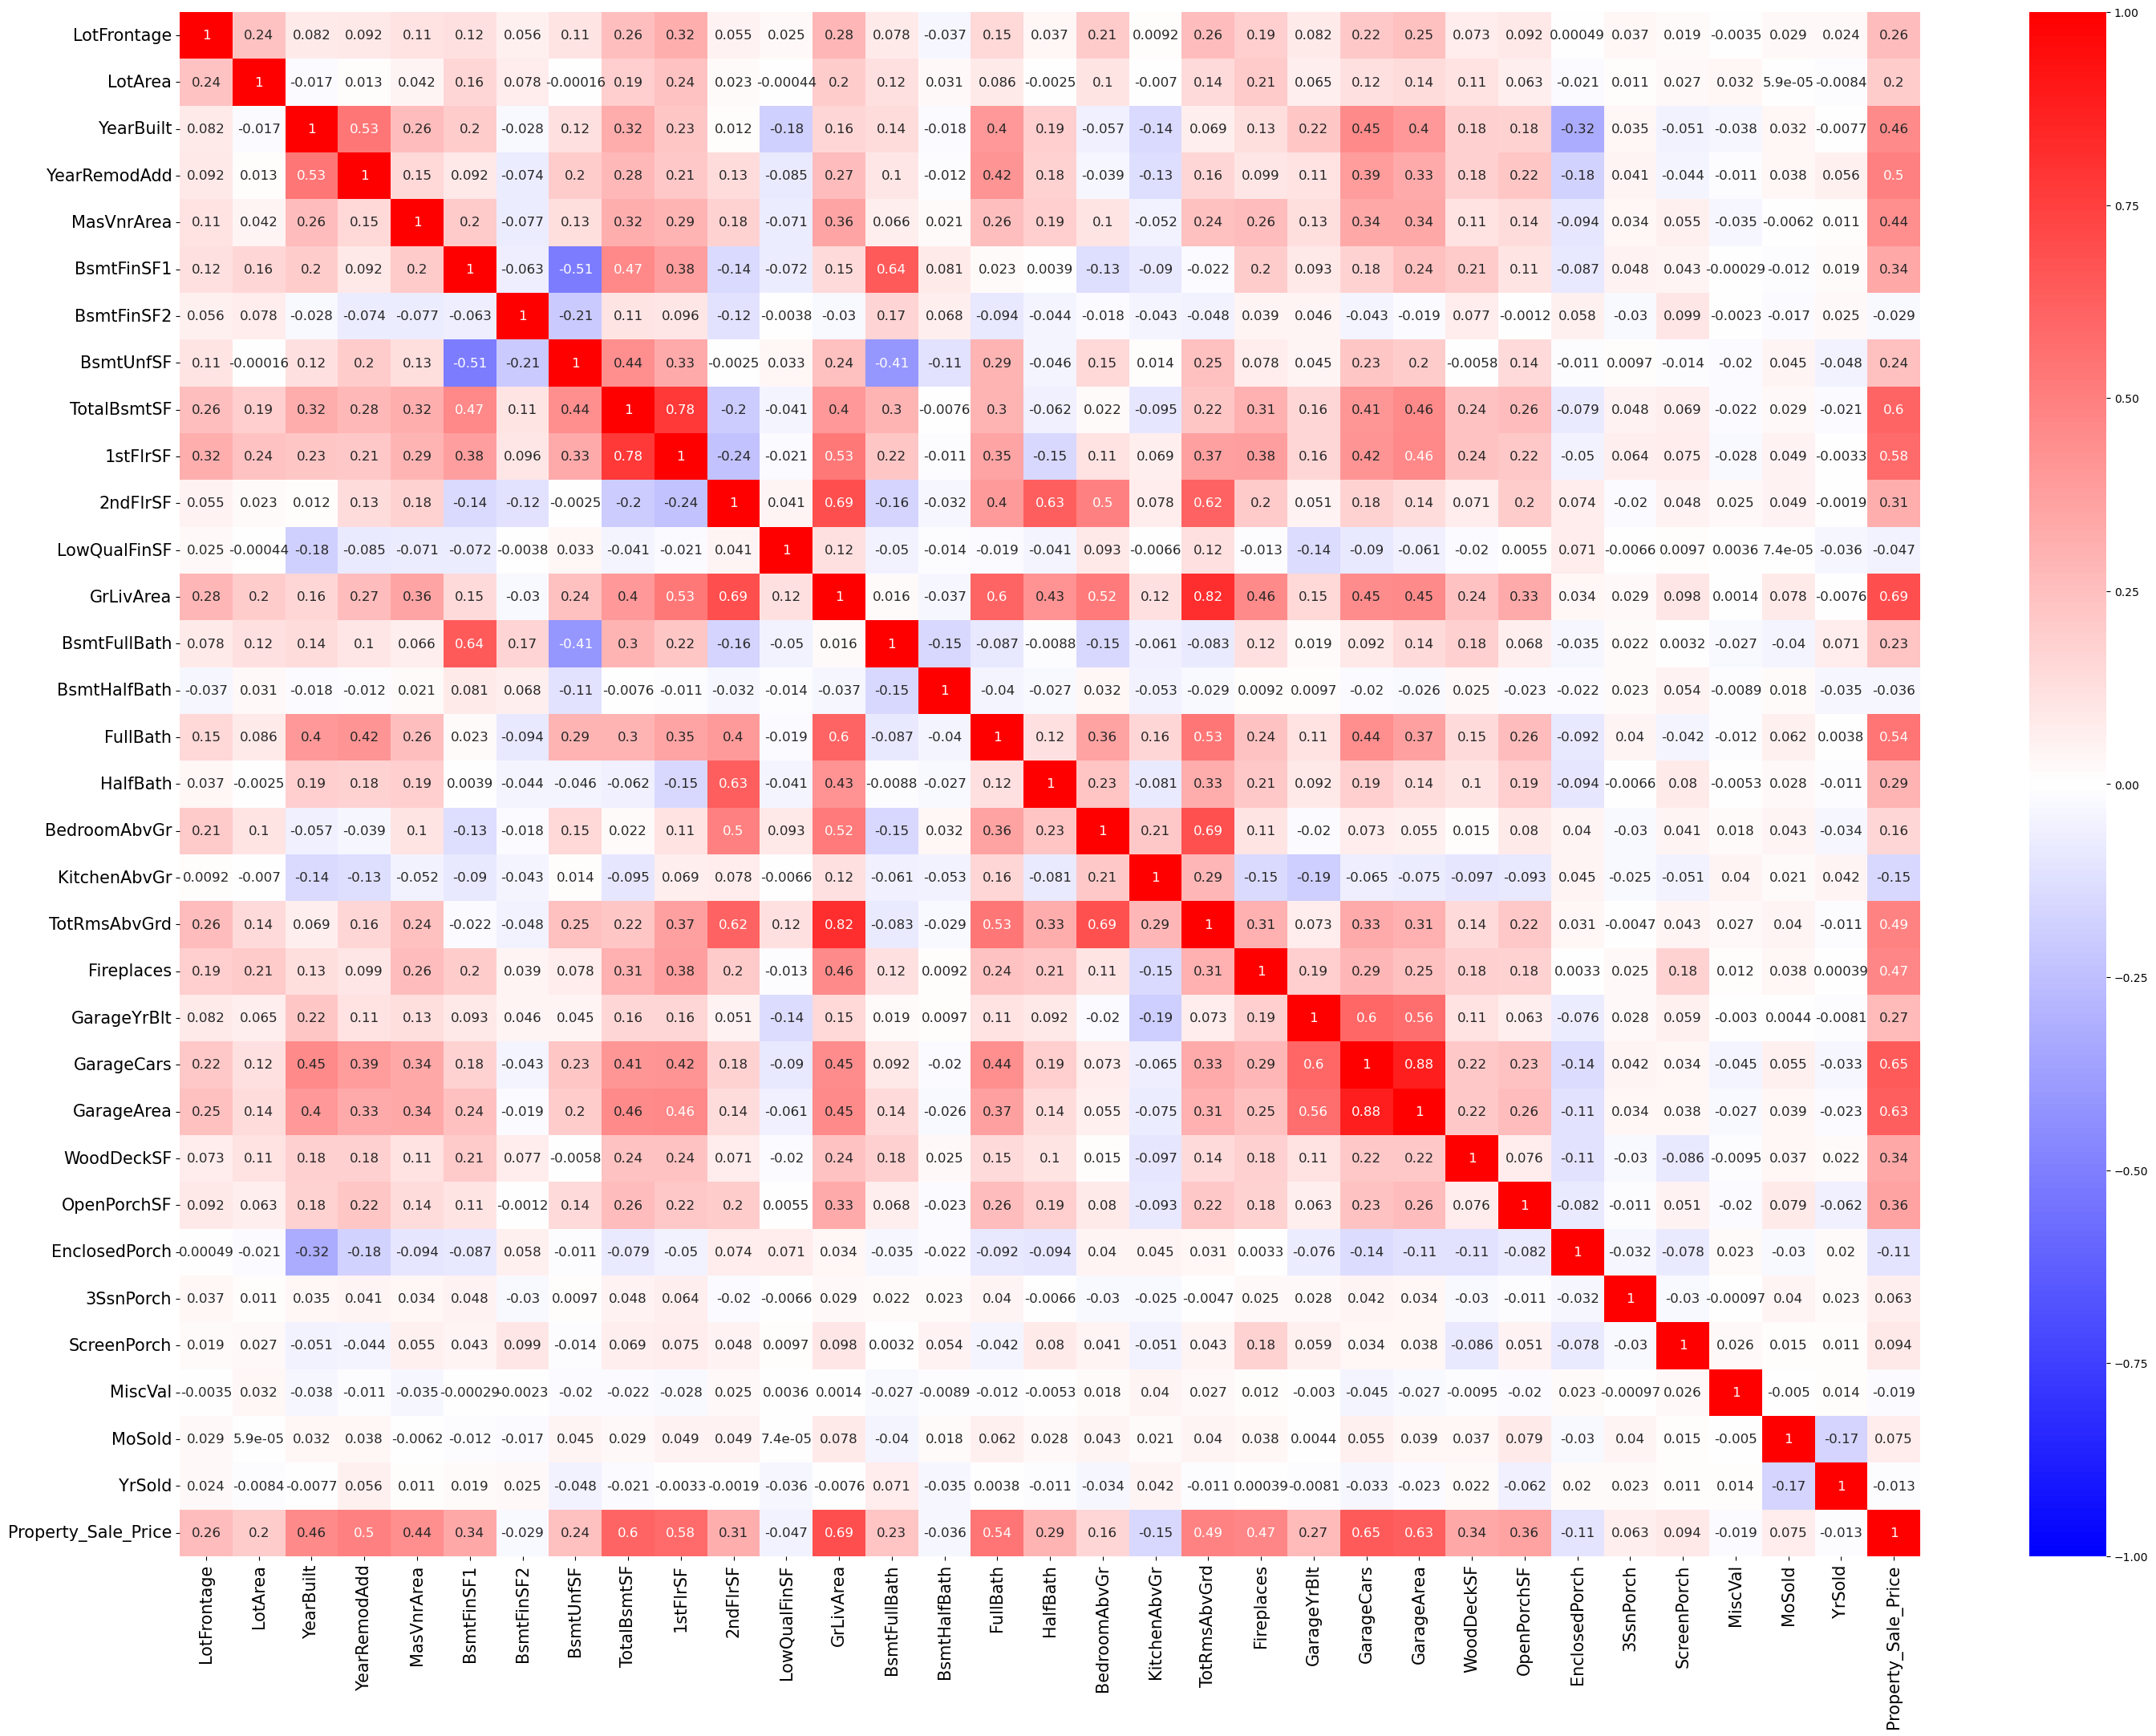

In [51]:
plt.figure(figsize = (35,25))
sns.heatmap(corrmat,annot = True, vmax = 1.0, vmin = -1.0, cmap = "bwr",annot_kws = {"size": 12})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

The diagonal represents the correlation of the variable with itself thus all the diagonal entries are '1'. The dark red squares represent the variables with strong positive correlation.

From the above plot we can see that the highest positive correlation (= 0.88) is between the variables 'GarageArea' and 'GarageCars'. Also there is strong positive correlation between the pairs (1StFlrSF, TotalBsmtSF) and (TotRmsAbvGrd, GrlivArea). There may be multicollinearity present.
No two variables have strong negative correlation in the dataset.

	
Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

### Analyze Relationships Between Target and Categorical Variables

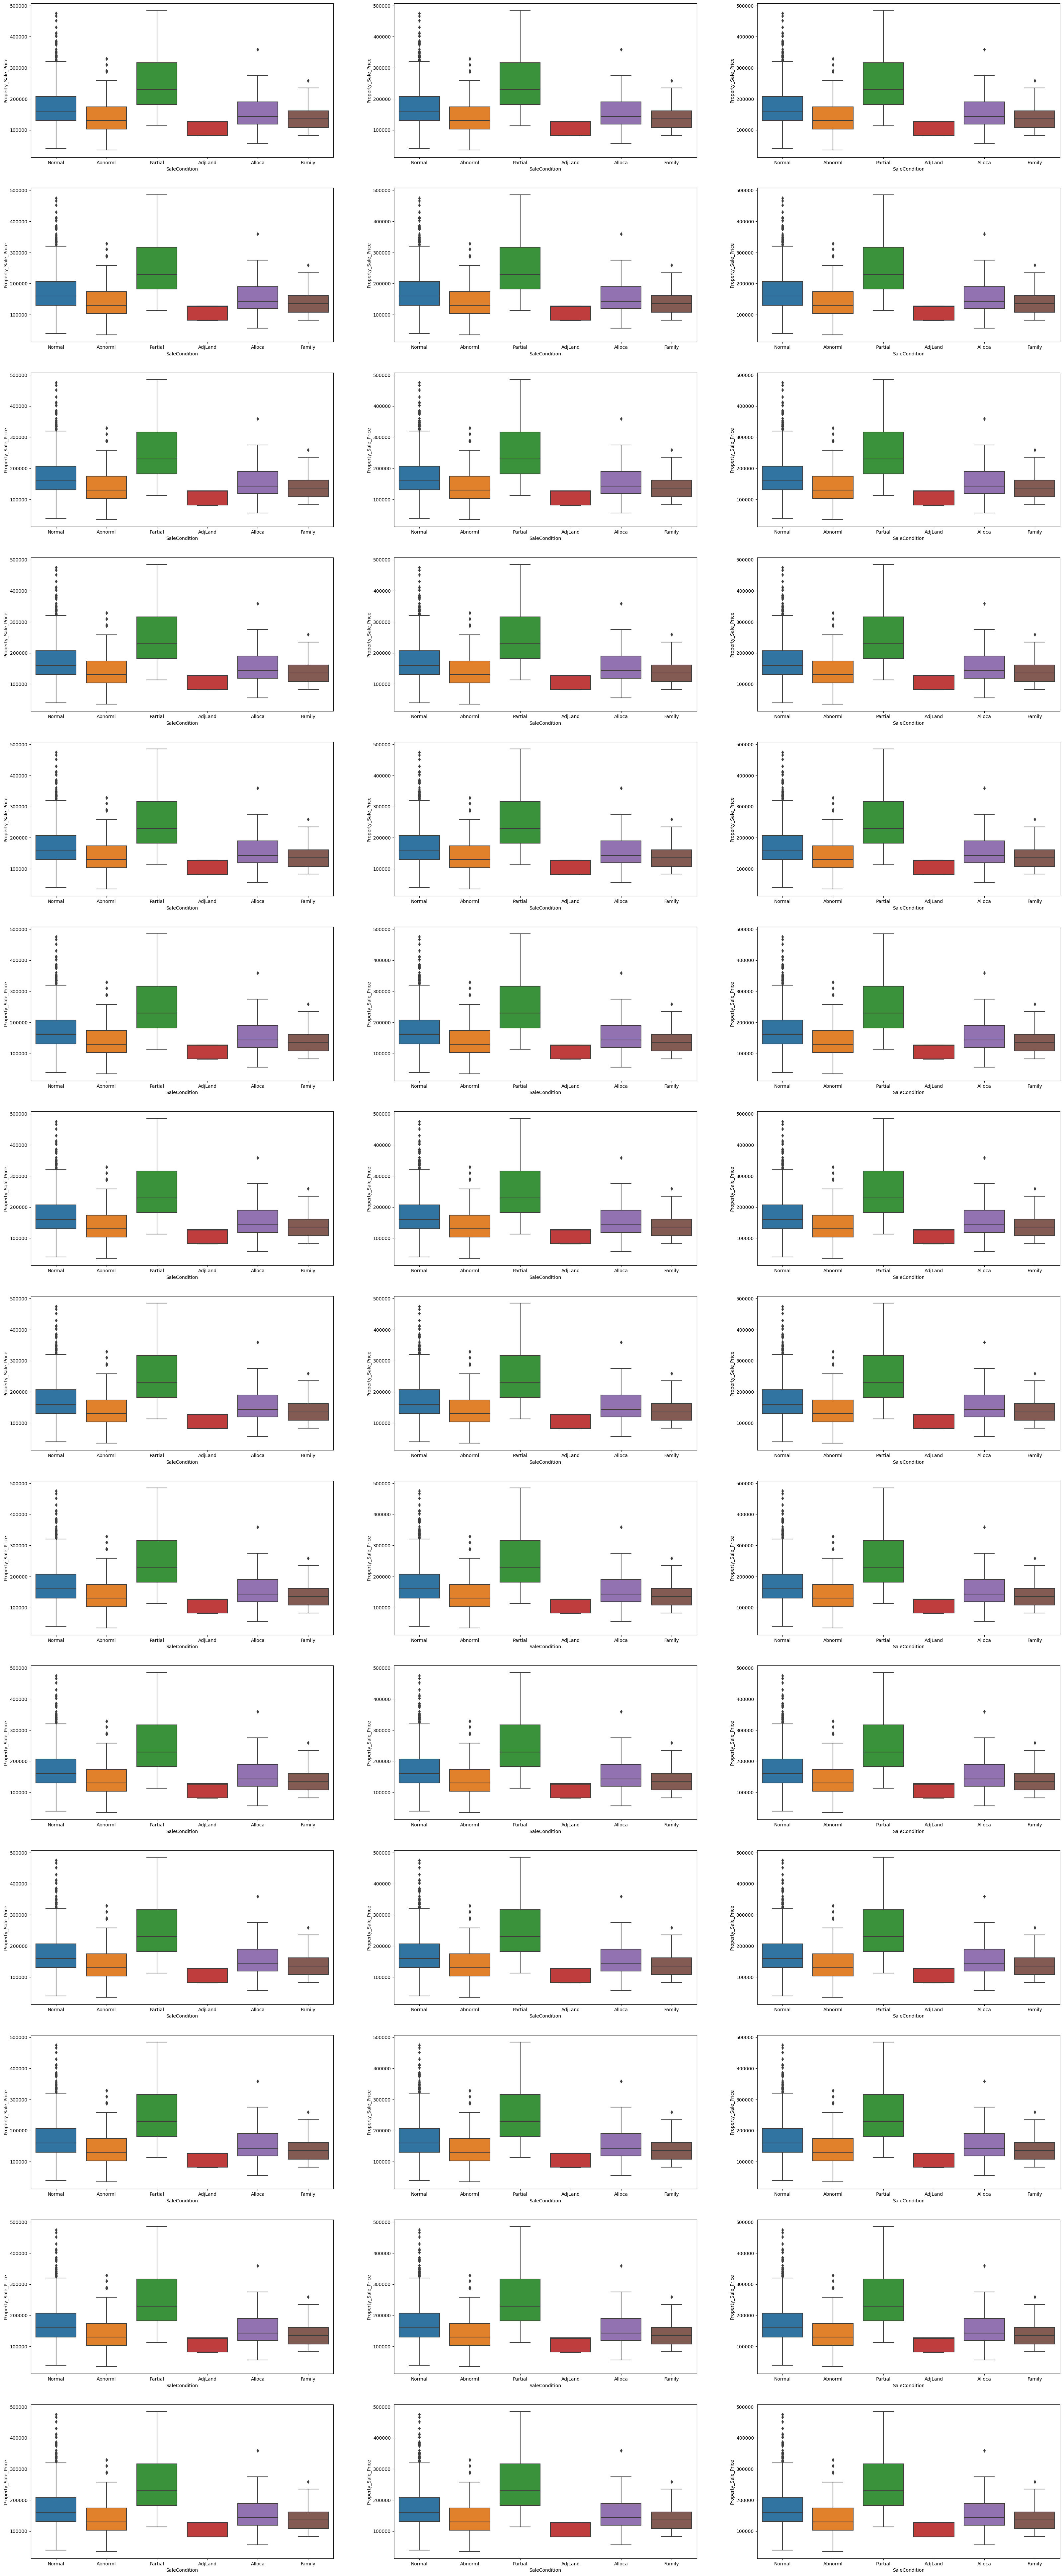

In [52]:
categorical = []

for column in df_property:
    if is_string_dtype(df_property[column]):
        categorical.append(df_property[column])
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40,100))

for variabel,subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = variable, y="Property_Sale_Price", data = df_property , ax = subplot)
    
plt.show()

### Data Preparation For Model Building

**check for Normality** For That we Plot histogram

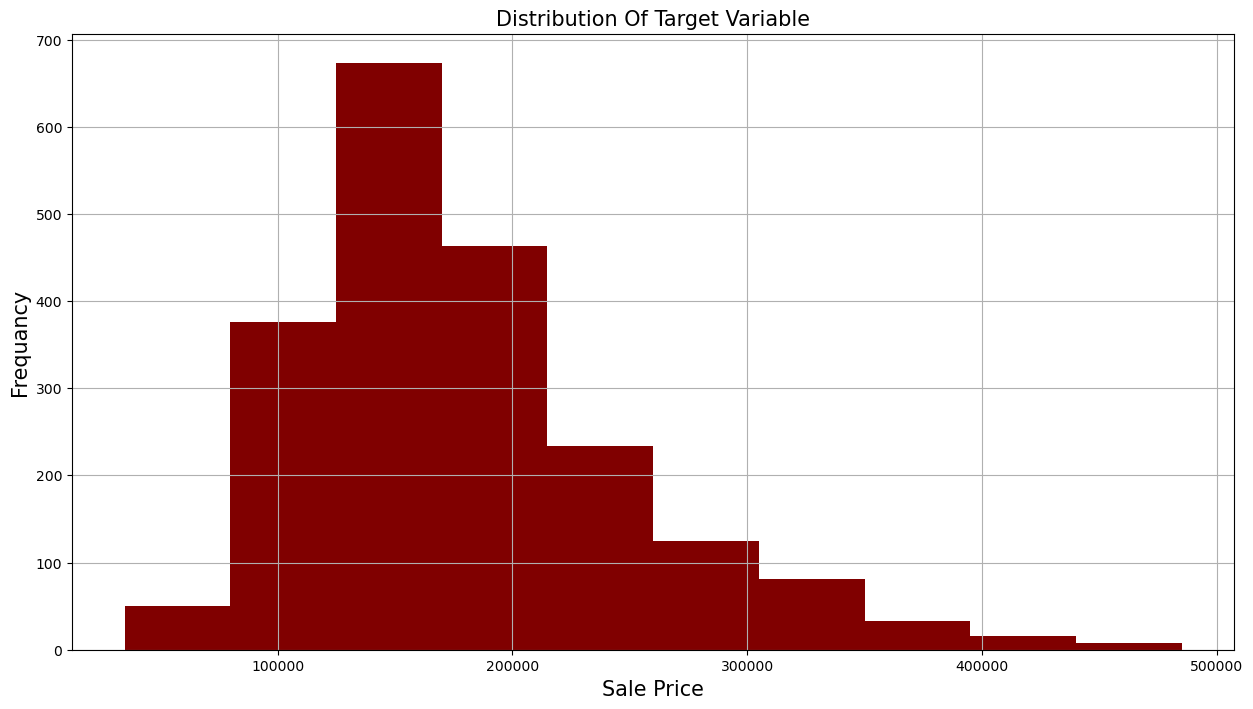

In [53]:
df_property.Property_Sale_Price.hist(color = "maroon")
plt.title("Distribution Of Target Variable",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)
plt.ylabel("Frequancy",fontsize = 15)
plt.show()

**We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can say that it is not normally distributed.**
	
**We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.**

**shapiro wilk test To check the Distribution of Variable**

In [54]:
stat, p = shapiro(df_property.Property_Sale_Price)

print("Statistics = %.3f,P-value =%.3f" % (stat,p))

alpha = 0.05

if p > alpha:
    print("The Data is normallly Distributed(Accept the Null Hypothesis )")
else:
    print("Data is Not Normally Distributed (Reject the Null Hypothesis )")

Statistics = 0.926,P-value =0.000
Data is Not Normally Distributed (Reject the Null Hypothesis )


We can see that the p-value is less than 0.05 and thus we reject the null hypothesis. It can be concluded that the data is not normally distributed.

We need to log transform the variable 'Property_Sale_Price' in order to reduce the skewness(to make Data Normally distributed.
	
Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.

**If the data is not normally distributed, use log transformation or exponensial transformation to reduce the skewness and get a near normally distributed data**

The log transformation can be used to reduce the skewness. To log transform the 'Property_Sale_Price' variable we use the function np.log().

In [55]:
df_property["Log_Property_Sale_Price"] = np.log(df_property.Property_Sale_Price)

df_property.head()

Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type            Alley  \
0         60         RL         65.0     8450      Pave  No alley Access   
1         20         RL         80.0     9600      Pave  No alley Access   
2         60         RL         68.0    11250      Pave  No alley Access   
3         70         RL         60.0     9550      Pave  No alley Access   
4         60         RL         84.0    14260      Pave  No alley Access   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle OverallQual OverallCond  \
0       Norm       Norm          1Fam     2Story           7           5   
1      Feedr       Norm          1Fam     1Story           6           8   
2       Norm       Norm          1Fam     2Story           7           5   
3       Norm       Norm          1Fam     2Story           7           5   
4       Norm       Norm          1Fam     2Story           8           5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd 

**Recheck for normality by plotting histogram and performing Shapiro-Wilk test for Log_Property_Sale_price**

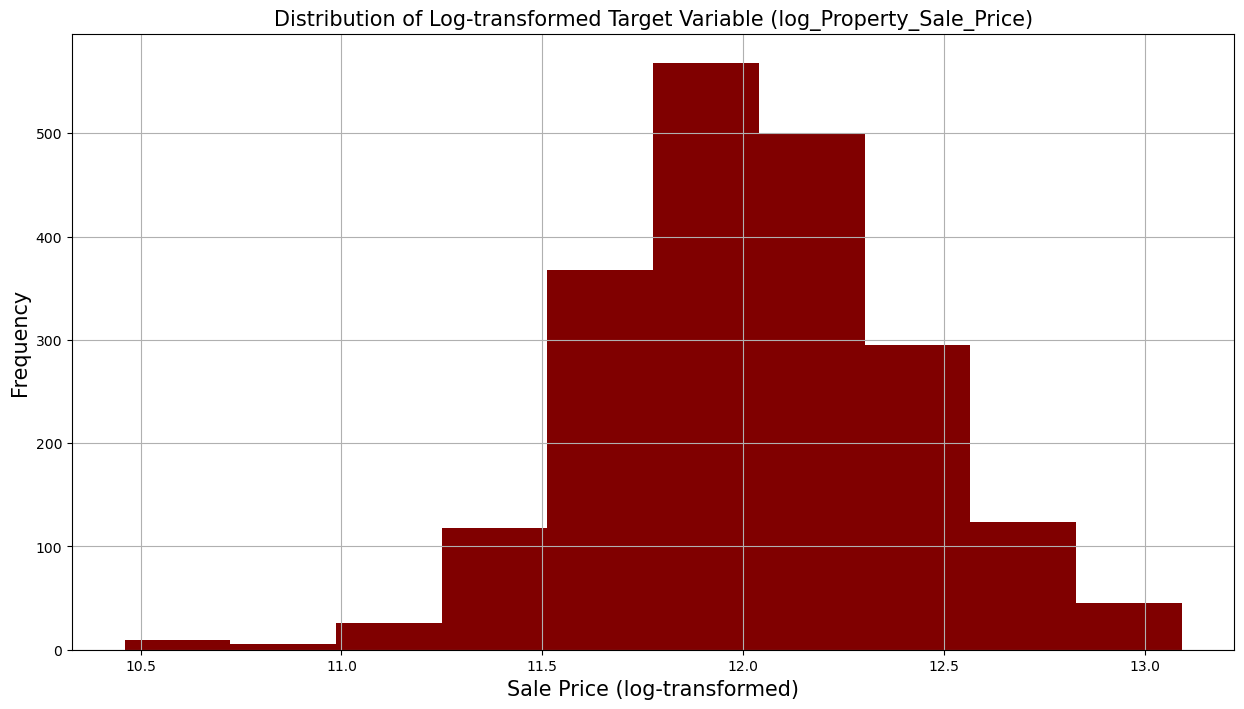

In [56]:
df_property.Log_Property_Sale_Price.hist(color = "maroon")
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

**It can be seen that the variable log_Property_Sale_Price is "near normally distributed"". Lets confirm it again by using the Shapiro-Wilk test.**

In [57]:
stat, p = shapiro(df_property.Log_Property_Sale_Price)
print("Statistics = %.3f, P-Value = %.3f" %(stat,p))

alpha = 0.05

if p > alpha:
    print("Data is Normally distributed (Accepte Null Hypothesis )")
else:
    print("Data is not normally distributed")

Statistics = 0.991, P-Value = 0.000
Data is not normally distributed


In [58]:
df_property.Log_Property_Sale_Price.skew()

-0.10293032838737998

**It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.**

## Dummy Encode the Categorical Variable 
**We need to perform dummy encoding on our categorical variables before we proceed; since the method of OLS works only on the numeric data.**

Filtering the Data to Numeric and Categorical

In [59]:
df_numeric_features = df_property.select_dtypes(include = np.number)
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'Log_Property_Sale_Price'],
      dtype='object')

In [60]:
df_categorical_features = df_property.select_dtypes(include = object)

In [61]:
df_categorical_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [62]:
dummy_encoded_variable = pd.get_dummies(df_categorical_features,drop_first = True)

In [63]:
dummy_encoded_variable.head()

Dwell_Type_150  Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Dwell_Type_20  Dwell_Type_30  Dwell_Type_303  Dwell_Type_40  Dwell_Type_45  \
0              0              0               0              0              0   
1              1              0               0              0              0   
2              0              0               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Dwell_Type_50  Dwell_Type_60  Dwell_Type_70  Dwell_Type_7080  \
0              0              1              0                0   
1              0              0              0                0   
2              0              1              0                0   
3              0              0              1                0   
4              0              1              0                0   

   Dwell_Type_75  Dwell_Type_80  Dwell_Type_85  Dwell_Type_90  Zone_Class_FV  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Zone_Class_RH  Zone_Class_RL  Zone_Class_RM  Road_Type_Pave  \
0              0              1              0               1   
1              0              1              0               1   
2              0              1              0               1   
3              0              1              0               1   
4              0              1              0               1   

   Alley_No alley Access  Alley_Pave  Property_Shape_IR2  Property_Shape_IR3  \
0                      1           0                   0                   0   
1                      1           0                   0                   0   
2                      1           0                   0                   0   
3                      1           0                   0                   0   
4                      1           0                   0                   0   

   Property_Shape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                   1                0                0                1   
1                   1                0                0                1   
2                   0                0                0                1   
3                   0                0                0                1   
4                   0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

Concate the numerical and Dummy of Categorical

In [64]:
df_property_dummy = pd.concat([df_numeric_features,dummy_encoded_variable], axis = 1)

df_property_dummy.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  MoSold  YrSold  Property_Sale_Price  Log_Property_Sale_Price  \
0        0       2    2008               208500                12.247694   
1        0       5    2007               181500                12.109011   
2        0       9    2008               223500                12.317167   
3        0       2    2006               140000                11.849398   
4        0      12    2008               250000                12.429216   

   Dwell_Type_150  Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Dwell_Type_20  Dwell_Type_30  Dwell_Type_303  Dwell_Type_40  Dwell_Type_45  \
0              0              0               0              0              0   
1              1              0               0              0              0   
2              0              0               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Dwell_Type_50  Dwell_Type_60  Dwell_Type_70  Dwell_Type_7080  \
0              0              1              0                0   
1              0              0              0                0   
2              0              1              0                0   
3              0              0              1                0   
4              0        

In [65]:
df_property_dummy.shape

(2059, 288)

**There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding.**

# Linear Regression(OLS)
## 5.1 Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)

#### Steps to Make a Model 

#### 1. Split the data into training and test sets
As the OLS function does not include the intercept term by default. Thus, we add the intercept column to the dataset i.e (y = B + B1 * X1 +E)

In [66]:
df_property_dummy = sm.add_constant(df_property_dummy)

X = df_property_dummy.drop(["Property_Sale_Price","Log_Property_Sale_Price"],axis = 1)

y = df_property_dummy[["Property_Sale_Price","Log_Property_Sale_Price"]]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of X_train is:",y_train.shape)
print("The shape of X_train is:",y_test.shape)

The shape of X_train is: (1441, 287)
The shape of X_test is: (618, 287)
The shape of X_train is: (1441, 2)
The shape of X_train is: (618, 2)


#### Building Model using sm.ols().fit()

In [67]:
linreg_logmodel_full = sm.OLS(y_train["Log_Property_Sale_Price"], X_train).fit()
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     Log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     71.93
Date:                     Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                             10:56:20   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1174   BIC:                            -813.4
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#### 3. Predicting the value using test data

In [68]:
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [69]:
X_test.shape

(618, 287)

In [70]:
linreg_logmodel_full_predictions.shape

(618,)

In [71]:
X_test.head()

const  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
1187    1.0         89.0    12461       1994          1995         0.0   
1716    1.0         91.0    10730       2003          2015       123.0   
926     1.0         93.0    11999       1936          2004       340.0   
111     1.0         70.0     7750       2000          2000         0.0   
1017    1.0         70.0     5814       1984          1984         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1187        1456           0        168         1624      1624         0   
1716           0           0        791          791      1236       857   
926            0           0       1181         1181      1234      1140   
111          250           0        134          384       774       656   
1017        1036           0        184         1220      1360         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1187             0       1624             1             0         2         0   
1716             0       2093             0             0         2         1   
926              0       2374             0             0         2         1   
111              0       1430             0             0         2         1   
1017             0       1360             1             0         1         0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
1187             2             1             5           1       1994.0   
1716             3             1             7           1       2003.0   
926              4             1            10           1       2003.0   
111              3             1             7           1       2000.0   
1017             1             1             4           1       1984.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1187           3         757           0          114            192   
1716           2         542         364           63              0   
926            3         656         104          100              0   
111            2         400         180            0              0   
1017           2         565          63            0              0   

      3SsnPorch  ScreenPorch  MiscVal  MoSold  YrSold  Dwell_Type_150  \
1187          0            0        0       7    2006               0   
1716          0            0        0      11    2008               0   
926           0            0        0       5    2007               0   
111           0            0        0       4    2010               0   
1017          0            0        0       8    2009               0   

      Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  Dwell_Type_20  \
1187               0               0               0              1   
1716               0               0               0              0   
926                0               0               0              0   
111                0               0               0              0   
1017               0               0               0              0   

      Dwell_Type_30  Dwell_Type_303  Dwell_Type_40  Dwell_Type_45  \
1187              0               0              0              0   
1716              0               0              0              0   
926               0               0              0              0   
111               0               0              0              0   
1017              0               0              0              0   

      Dwell_Type_50  Dwell_Type_60  Dwell_Type_70  Dwell_Type_7080  \
1187              0              0              0                0   
1716              0              1              0                0   
926               0              1              0                0   
111               0              0              0                0   
1017              0              0              0                0   

      Dwell_Type_75  Dwell_Type

In [72]:
linreg_logmodel_full_predictions

1187    12.546073
1716    12.179666
926     12.649147
111     12.023753
1017    12.157159
1107    12.387501
1987    12.615613
1228    12.818611
1075    12.285375
851     12.108432
455     11.921666
706     12.501956
767     12.039542
422     11.729541
1830    12.652903
1981    11.902054
539     12.419906
1683    11.774921
2008    11.930172
514     11.501465
1391    11.769087
838     11.949759
293     12.305774
1554    12.202124
120     10.054339
56      12.189579
1000    10.944432
794     12.244344
1424    11.758426
818     11.897154
1003    11.757915
1640    11.733845
415     12.145862
904     11.701410
850     11.869604
449     11.646525
1826    12.198923
700     12.623191
1145    11.739402
1852    11.911296
75      11.505440
242     11.555453
169     12.260288
1543    12.382641
348     12.117899
47      12.378291
1011    11.484454
1626    12.286780
1463    12.592022
537     11.693455
549     12.374891
1784    11.700245
829     11.954910
1220    11.512996
237     12.253278
587     11

In [73]:
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

actual_Property_Sale_Price = y_test["Property_Sale_Price"]

In [74]:
predicted_Property_Sale_Price

1187    280989.597575
1716    194787.805974
926     311497.611505
111     166667.002873
1017    190452.618050
1107    239785.731932
1987    301225.051786
1228    369021.769410
1075    216506.308648
851     181394.878625
455     150492.173560
706     268862.799351
767     169319.332704
422     124186.615768
1830    312669.874092
1981    147569.350522
539     247683.248066
1683    129952.111614
2008    151777.711492
514      98860.521420
1391    129196.200252
838     154779.767374
293     220968.083995
1554    199211.837980
120      23256.484702
56      196728.296837
1000     56637.784915
794     207802.665619
1424    127826.119577
818     146848.101164
1003    127760.850534
1640    124722.364818
415     188313.155264
904     120741.812335
850     142857.695599
449     114293.539935
1826    198575.163439
700     303516.537418
1145    125417.372412
1852    148939.631341
75       99254.283033
242     104344.527881
169     211142.295990
1543    238623.261369
348     183120.336071
47      23

In [75]:
actual_Property_Sale_Price

1187    262000
1716    215000
926     285000
111     180000
1017    187500
1107    274725
1987    310000
1228    367294
1075    219500
851     215000
455     175500
706     302000
767     160000
422     113000
1830    303477
1981    167500
539     272000
1683    127000
2008    144500
514      96500
1391    124000
838     144000
293     235000
1554    133900
120     180000
56      172500
1000     82000
794     194500
1424    144000
818     155000
1003    136905
1640    144000
415     181134
904     125500
850     131500
449     120000
1826    200500
700     312500
1145    149000
1852    142953
75       91000
242      79000
169     228000
1543    245000
348     154000
47      249700
1011    100000
1626    230000
1463    319900
537     111250
549     263000
1784    107000
829     147400
1220    115000
237     194500
587     137000
182     120000
1179     93000
1877    169990
560     121500
1331    132500
1512    178900
286     159000
1667    287090
1299    154000
885     328900
1549     8

#### Compute accuracy measures

In [76]:
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price,predicted_Property_Sale_Price)

linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

linreg_logmodel_full_rsquared_adj=linreg_logmodel_full.rsquared_adj 

#### Tabulate the results

In [77]:
cols  = ["Model","RMSE","R-Squared"]
result_tabulation = pd.DataFrame(columns = cols)

linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)
result_tabulation

Model          RMSE  R-Squared  \
0  Linreg full model with log of target variable   26697.275445   0.942188   

   Adj. R-Squared  
0        0.929089

We will also build a linear regression model without performing log transformation on the target variable.

# Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'Property_Sale_Price' variable as it is.

**We have already done train and test split while building the previous model.**

**1.Build Model**

In [78]:
linreg_nolog_model = sm.OLS(y_train["Property_Sale_Price"], X_train).fit()

In [79]:
print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     72.15
Date:                 Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                         10:56:32   Log-Likelihood:                -16075.
No. Observations:                 1441   AIC:                         3.268e+04
Df Residuals:                     1174   BIC:                         3.409e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [80]:
linreg_nolog_model_prediction = linreg_nolog_model.predict(X_test)

In [81]:
linreg_nolog_model_prediction.shape

(618,)

In [82]:
actual_Property_Sale_Price.shape

(618,)

#### 3. Compute accuracy measures
Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared

In [83]:
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price,linreg_nolog_model_prediction)
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj

#### 4.Tabluating the result

In [84]:
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})

result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

result_tabulation

Model          RMSE  R-Squared  \
0     Linreg full model with log of target variable   26697.275445   0.942188   
1  Linreg full model without log of target variable   36251.022023   0.942355   

   Adj. R-Squared  
0        0.929089  
1        0.929294

If we compare the results in the table we can see that the linreg model with log of target variable is performing slightly better than the model without log of target variable. Thus we will continue with the target variable 'log_Property_Sale_Price'.

Let us perform feature engineering and take a look at building a linear regression full model by adding new features to the dataset.

## Feature Engineering

**Feature Engineering :** It is the process of creating new features using domain knowledge of the data that provides more insight into the data. Let us create a few features from the existing dataset and build a regression model on the newly created data.

**In order to build the model, we do the Following:**
1 Creating new features name(TotalSF) by using variables "TotalBsmtSF","1stFirSF","2ndFirSF" and GrLivArea'.

**Calculating the complete area of the house.**
Create a new variable TotalSF representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.

In [85]:
df_property['TotalSF'] = df_property['TotalBsmtSF'] + df_property['1stFlrSF'] + df_property['2ndFlrSF'] + df_property['GrLivArea']
df_property.head()

Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type            Alley  \
0         60         RL         65.0     8450      Pave  No alley Access   
1         20         RL         80.0     9600      Pave  No alley Access   
2         60         RL         68.0    11250      Pave  No alley Access   
3         70         RL         60.0     9550      Pave  No alley Access   
4         60         RL         84.0    14260      Pave  No alley Access   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle OverallQual OverallCond  \
0       Norm       Norm          1Fam     2Story           7           5   
1      Feedr       Norm          1Fam     1Story           6           8   
2       Norm       Norm          1Fam     2Story           7           5   
3       Norm       Norm          1Fam     2Story           7           5   
4       Norm       Norm          1Fam     2Story           8           5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd 

In [86]:
df_property = df_property.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [87]:
df_numeric_features = df_property.select_dtypes(include = np.number)
df_categorical_features = df_property.select_dtypes(include = object)

#### Dummy encoding the categorical variables

In [88]:
dummy_encoded_variable = pd.get_dummies(df_categorical_features,drop_first = True)

#### Concatination the categorical and numercial features

In [89]:
df_dummy = pd.concat([df_numeric_features,dummy_encoded_variable],axis = 1)
df_dummy.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0        150             0             1             0         2   
1           0        284             0             0             1         2   
2           0        434             0             1             0         2   
3           0        540             0             1             0         1   
4           0        490             0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  YrSold  \
0              0          0            0        0       2    2008   
1              0          0            0        0       5    2007   
2              0          0            0        0       9    2008   
3            272          0            0        0       2    2006   
4              0          0            0        0      12    2008   

   Property_Sale_Price  Log_Property_Sale_Price  TotalSF  Dwell_Type_150  \
0               208500                12.247694     4276               0   
1               181500                12.109011     3786               0   
2               223500                12.317167     4492               0   
3               140000                11.849398     4190               0   
4               250000                12.429216     5541               0   

   Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  Dwell_Type_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   Dwell_Type_30  Dwell_Type_303  Dwell_Type_40  Dwell_Type_45  Dwell_Type_50  \
0              0               0              0              0              0   
1              0               0              0              0              0   
2              0               0              0              0              0   
3              0               0              0              0              0   
4              0               0              0              0              0   

   Dwell_Type_60  Dwell_Type_70  Dwell_Type_7080  Dwell_Type_75  \
0              1              0                0              0   
1              0              0                0              0   
2              1              0                0              0   
3              0              1                0              0   
4              1              0                0              0   

   Dwell_Type_80  Dwell_Type_85  Dwell_Type_90  Zone_Class_FV  Zone_Class_RH

#### split the data into train and test sets

In [90]:
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop(["Property_Sale_Price","Log_Property_Sale_Price"], axis = 1 )

y = df_dummy[["Property_Sale_Price","Log_Property_Sale_Price"]]

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print("The Shape pf X_train is ", X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The Shape pf X_train is  (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


#### Building Model

In [91]:
linreg_feature_2_model = sm.OLS(y_train["Log_Property_Sale_Price"], X_train).fit()
print(linreg_feature_2_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                             10:56:51   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [92]:
linreg_feature_2_model_predictions = linreg_feature_2_model.predict(X_test)

In [93]:
linreg_feature_2_model_predictions

1187    12.546026
1716    12.179357
926     12.649120
111     12.024083
1017    12.156930
1107    12.387630
1987    12.615865
1228    12.818481
1075    12.284920
851     12.108383
455     11.921772
706     12.501673
767     12.039736
422     11.729762
1830    12.653368
1981    11.902090
539     12.419072
1683    11.775163
2008    11.930596
514     11.499958
1391    11.769008
838     11.949528
293     12.305065
1554    12.202734
120     10.051995
56      12.189545
1000    10.945138
794     12.243555
1424    11.758717
818     11.896897
1003    11.757726
1640    11.734201
415     12.145849
904     11.701396
850     11.869811
449     11.646665
1826    12.200532
700     12.622871
1145    11.739632
1852    11.912490
75      11.506520
242     11.554969
169     12.260291
1543    12.382391
348     12.117885
47      12.378222
1011    11.484426
1626    12.286814
1463    12.591935
537     11.693402
549     12.375043
1784    11.700555
829     11.955151
1220    11.513280
237     12.252928
587     11

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()

In [94]:
predicted_Property_Sale_Price = np.exp(linreg_feature_2_model_predictions)

In [95]:
predicted_Property_Sale_Price.head()

1187    280976.509846
1716    194727.709185
926     311489.100683
111     166722.073638
1017    190409.128653
dtype: float64

In [96]:
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [97]:
actual_Property_Sale_Price.head()

1187    262000
1716    215000
926     285000
111     180000
1017    187500
Name: Property_Sale_Price, dtype: int64

#### compute accuracy measures (matrix)

In [98]:
linreg_feature_2_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_feature_2_model_rsquared = linreg_feature_2_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_feature_2_model_rsquared_adj = linreg_feature_2_model.rsquared_adj 

#### Tabulating Result

In [99]:
linreg_feature_2_model_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_feature_2_model_rmse,
                                                'R-Squared': linreg_feature_2_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_2_model_rsquared_adj})


In [100]:
result_tabulation = result_tabulation.append(linreg_feature_2_model_metrics, ignore_index = True)

result_tabulation

Model          RMSE  R-Squared  \
0     Linreg full model with log of target variable   26697.275445   0.942188   
1  Linreg full model without log of target variable   36251.022023   0.942355   
2  Linreg with new features (Building_age and Rem...  26702.002175   0.942187   

   Adj. R-Squared  
0        0.929089  
1        0.929294  
2        0.929148

## Feature Selection

#### 6.1 Variance Inflation Factor
The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate the VIF of the numerical independent variables. VIF for the variable Vi is given as:

VIF = 1 / (1 - R-squared)


Where, R-squared is the R-squared of the regression model build by regressing one independent variable (say Vi) on all the remaining independent variables (say Vj, j ≠ i).

In [101]:
df_property_features = df_property.drop(['Property_Sale_Price', 'Log_Property_Sale_Price'], axis = 1)
df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])
df_numeric_features_vif.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0        150             0             1             0         2   
1           0        284             0             0             1         2   
2           0        434             0             1             0         2   
3           0        540             0             1             0         1   
4           0        490             0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  YrSold  TotalSF  
0              0          0            0        0       2    2008     4276  
1              0          0            0        0       5    2007     3786  
2              0          0            0        0       9    2008     4492  
3            272          0            0        0       2    2006     4190  
4              0          0            0        0      12    2008     5541

Calculating the VIF for each numeric Variable

In [102]:
vif = pd.DataFrame()

In [103]:
#Using List Comprihendion to do looping
vif["Features"] = df_numeric_features_vif.columns
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i)
                     for i in range(df_numeric_features_vif.shape[1])]

vif.sort_values(by = "VIF_Factor",ascending = False).reset_index(drop = True)

Features    VIF_Factor
0          YrSold  17385.654940
1    YearRemodAdd  16290.307042
2       YearBuilt   8594.069975
3         TotalSF    111.304515
4    TotRmsAbvGrd     85.375156
5      GarageCars     38.797298
6     GarageYrBlt     33.453706
7      GarageArea     31.120937
8    BedroomAbvGr     29.697535
9    KitchenAbvGr     27.992916
10       FullBath     22.582488
11      BsmtUnfSF     11.088055
12     BsmtFinSF1     11.025229
13    LotFrontage     10.623304
14         MoSold      6.650086
15   BsmtFullBath      3.601835
16     Fireplaces      2.851877
17        LotArea      2.695361
18       HalfBath      2.617169
19    OpenPorchSF      1.841658
20     WoodDeckSF      1.834781
21     BsmtFinSF2      1.756288
22     MasVnrArea      1.747740
23  EnclosedPorch      1.336468
24   BsmtHalfBath      1.213516
25    ScreenPorch      1.189596
26   LowQualFinSF      1.110432
27      3SsnPorch      1.031724
28        MiscVal      1.022433

We can see that the variable 'YrSold' has the highest VIF. We will remove the variables having VIF greater than 10. We want to remove the variable for which the remaining variables explain more than 90% of the variation and thus we set the threshold to 10. The value of threshold is completely experimental i.e. it depends on the business requirements. One can choose the threshold other than 10.`

In [104]:
df_numeric_features_vif.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [105]:
for i in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["Features"] = df_numeric_features_vif.columns
    vif["VIF_factor"] = [variance_inflation_factor(df_numeric_features_vif.values,i)
                         for i in range(df_numeric_features_vif.shape[1])]
    vif_more_than_10 = vif[vif["VIF_factor"] > 10]
    
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = "VIF_factor", ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

         Features  VIF_factor
0     LotFrontage    8.251985
1         LotArea    2.628386
2      MasVnrArea    1.661640
3      BsmtFinSF1    5.642573
4      BsmtFinSF2    1.378533
5       BsmtUnfSF    4.767101
6    LowQualFinSF    1.032342
7    BsmtFullBath    3.392684
8    BsmtHalfBath    1.177563
9        HalfBath    1.786522
10     Fireplaces    2.443556
11     GarageArea    8.319284
12     WoodDeckSF    1.777316
13    OpenPorchSF    1.725037
14  EnclosedPorch    1.164377
15      3SsnPorch    1.024811
16    ScreenPorch    1.159212
17        MiscVal    1.014042
18         MoSold    4.947897


#### Now agin In order to build the model, we do the following 

Now, let us build the model using the categorical variables and the numerical variables obtained from VIF.
### 1. Concatenate numerical and dummy encoded categorical variables

In [106]:
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variable], axis=1)
df_dummy.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  HalfBath  Fireplaces  GarageArea  \
0             0             1             0         1           0         548   
1             0             0             1         0           1         460   
2             0             1             0         1           1         608   
3             0             1             0         0           1         642   
4             0             1             0         1           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   MoSold  Dwell_Type_150  Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  \
0       2               0               0               0               0   
1       5               0               0               0               0   
2       9               0               0               0               0   
3       2               0               0               0               0   
4      12               0               0               0               0   

   Dwell_Type_20  Dwell_Type_30  Dwell_Type_303  Dwell_Type_40  Dwell_Type_45  \
0              0              0               0              0              0   
1              1              0               0              0              0   
2              0              0               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Dwell_Type_50  Dwell_Type_60  Dwell_Type_70  Dwell_Type_7080  \
0              0              1              0                0   
1              0              0              0                0   
2              0              1              0                0   
3              0              0              1                0   
4              0              1              0                0   

   Dwell_Type_75  Dwell_Type_80  Dwell_Type_85  Dwell_Type_90  Zone_Class_FV  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Zone_Class_RH  Zone_Class_RL  Zone_Class_RM  Road_Type_Pave  \
0              0              1              0               1   
1              0              1              0               1   
2              0              1              0               1   
3              0              1              0               1   
4              0              1              0               1   

   Alley_No alley Access  Alley_Pave  Property_Shape_IR2  Property_Shape_IR3  \
0                      1           0                   0                   0   
1                      1           0                   0                   0   
2                      1           0                   0                   0   
3                      1           0               

### Spliting the Data Again

In [107]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy.copy()

# extract the target variable from the data set
y = df_property[['Property_Sale_Price','Log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 274)
The shape of X_test is: (618, 274)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


### Building model

In [108]:
linreg_vif_model = sm.OLS(y_train['Log_Property_Sale_Price'], X_train).fit()
print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Log_Property_Sale_Price   R-squared:                       0.930
Model:                                 OLS   Adj. R-squared:                  0.915
Method:                      Least Squares   F-statistic:                     61.62
Date:                     Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                             10:57:06   Log-Likelihood:                 1238.5
No. Observations:                     1441   AIC:                            -1965.
Df Residuals:                         1185   BIC:                            -615.0
Df Model:                              255                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Predictions

In [109]:
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

In [110]:
predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

### Evaluating model

In [111]:
# calculate rmse using rmse()
linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_vif_model_rsquared = linreg_vif_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

In [112]:
linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)
result_tabulation

Model          RMSE  R-Squared  \
0     Linreg full model with log of target variable   26697.275445   0.942188   
1  Linreg full model without log of target variable   36251.022023   0.942355   
2  Linreg with new features (Building_age and Rem...  26702.002175   0.942187   
3                                    Linreg with VIF  32580.479840   0.929870   

   Adj. R-Squared  
0        0.929089  
1        0.929294  
2        0.929148  
3        0.914778

# Conclusion

**From the above table we can see that the linear regression with new features has the lowest RMSE value. Thus, it can be concluded that the linear regression model with new features can be used to predict the price of the house.**